In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
data = pd.read_csv("rawdata/od_20230901_10/od_20230901_1.csv")

In [3]:
data.columns

Index(['origin_hdong_cd', 'dest_hdong_cd', 'date', 'start_time', 'end_time',
       'gender', 'age', 'modal', 'origin_purpose', 'dest_purpose',
       'od_dist_avg', 'od_duration_avg', 'od_cnts'],
      dtype='object')

In [4]:
print(data.isnull().sum())
data.info()

origin_hdong_cd       0
dest_hdong_cd         0
date                  0
start_time            0
end_time              0
gender                0
age                   0
modal                37
origin_purpose     1796
dest_purpose          0
od_dist_avg           0
od_duration_avg       0
od_cnts               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726136 entries, 0 to 3726135
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   origin_hdong_cd  int64  
 1   dest_hdong_cd    int64  
 2   date             int64  
 3   start_time       object 
 4   end_time         object 
 5   gender           int64  
 6   age              int64  
 7   modal            float64
 8   origin_purpose   float64
 9   dest_purpose     int64  
 10  od_dist_avg      int64  
 11  od_duration_avg  int64  
 12  od_cnts          int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 369.6+ MB


In [5]:
# 'start_time'과 'end_time' 컬럼을 시간 형식으로 변환
data['start_time'] = pd.to_datetime(data['start_time'], errors='coerce', format='%H:%M').dt.time
data['end_time'] = pd.to_datetime(data['end_time'], errors='coerce', format='%H:%M').dt.time

# 변환 후 결측치가 생긴 경우 확인
print(data[data['start_time'].isna() | data['end_time'].isna()])

# 변환 결과 데이터 타입 확인
print(data.dtypes)
print(data[['start_time', 'end_time']].head())



Empty DataFrame
Columns: [origin_hdong_cd, dest_hdong_cd, date, start_time, end_time, gender, age, modal, origin_purpose, dest_purpose, od_dist_avg, od_duration_avg, od_cnts]
Index: []
origin_hdong_cd      int64
dest_hdong_cd        int64
date                 int64
start_time          object
end_time            object
gender               int64
age                  int64
modal              float64
origin_purpose     float64
dest_purpose         int64
od_dist_avg          int64
od_duration_avg      int64
od_cnts              int64
dtype: object
  start_time  end_time
0   12:00:00  13:00:00
1   12:00:00  12:00:00
2   18:00:00  18:00:00
3   19:00:00  19:00:00
4   21:00:00  22:00:00


In [6]:
import pandas as pd

dong_code = pd.read_csv("rawdata/KIKmix_20230701.csv")
filtered_dong_code = dong_code[(dong_code['시도명'] == '서울특별시') & (dong_code['읍면동명'] == '회현동')]
filtered_dong_code 


,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
108,1114054000,서울특별시,중구,회현동,1114011200,남창동,19880423,NaN
109,1114054000,서울특별시,중구,회현동,1114011600,남대문로3가,19920416,NaN
110,1114054000,서울특별시,중구,회현동,1114011700,남대문로4가,19920416,NaN
111,1114054000,서울특별시,중구,회현동,1114011800,남대문로5가,19980914,NaN
112,1114054000,서울특별시,중구,회현동,1114011900,봉래동1가,19980914,NaN
113,1114054000,서울특별시,중구,회현동,1114012000,봉래동2가,19980914,NaN
114,1114054000,서울특별시,중구,회현동,1114012100,회현동1가,19880423,NaN
115,1114054000,서울특별시,중구,회현동,1114012200,회현동2가,19880423,NaN
116,1114054000,서울특별시,중구,회현동,1114012400,충무로1가,19880423,NaN
117,1114054000,서울특별시,중구,회현동,1114016800,순화동,19980914,NaN


In [22]:
seoul_dongcode = dong_code[dong_code['시도명']=="서울특별시"]['행정동코드'].to_list()
target_dongricode = dong_code[(dong_code['시도명']=="서울특별시")&(dong_code['읍면동명']=='회현동')]['행정동코드'].to_list()

In [29]:
target_dongricode.unique()

array([1.114054e+09])

In [16]:
da = data.merge(dong_code, left_on='dest_hdong_cd', right_on='행정동코드', how='left')
da


,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,...,od_duration_avg,od_cnts,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
0,1130563500,1130559500,20230901,12:00:00,13:00:00,1,3,0.0,1.0,1,...,58,7,1.130560e+09,서울특별시,강북구,번1동,1.130510e+09,번동,20190101.0,NaN
1,2714072000,2714073000,20230901,12:00:00,12:00:00,1,4,0.0,0.0,0,...,4,16,2.714073e+09,대구광역시,동구,안심2동,2.714012e+09,용계동,19950101.0,NaN
2,2714072000,2714073000,20230901,12:00:00,12:00:00,1,4,0.0,0.0,0,...,4,16,2.714073e+09,대구광역시,동구,안심2동,2.714012e+09,율암동,19950101.0,NaN
3,2714072000,2714073000,20230901,12:00:00,12:00:00,1,4,0.0,0.0,0,...,4,16,2.714073e+09,대구광역시,동구,안심2동,2.714012e+09,상매동,19950101.0,NaN
4,2714072000,2714073000,20230901,12:00:00,12:00:00,1,4,0.0,0.0,0,...,4,16,2.714073e+09,대구광역시,동구,안심2동,2.714012e+09,매여동,19950101.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12744322,1162066500,1162074500,20230901,10:00:00,11:00:00,1,2,1.0,0.0,0,...,60,5,1.162074e+09,서울특별시,관악구,삼성동,1.162010e+09,신림동,20080901.0,NaN
12744323,3611051800,4415051000,20230901,22:00:00,23:00:00,1,3,0.0,4.0,0,...,49,5,4.415051e+09,충청남도,공주시,중학동,4.415010e+09,반죽동,19981202.0,NaN
12744324,3611051800,4415051000,20230901,22:00:00,23:00:00,1,3,0.0,4.0,0,...,49,5,4.415051e+09,충청남도,공주시,중학동,4.415010e+09,봉황동,19981202.0,NaN
12744325,3611051800,4415051000,20230901,22:00:00,23:00:00,1,3,0.0,4.0,0,...,49,5,4.415051e+09,충청남도,공주시,중학동,4.415010e+09,중학동,19880423.0,NaN


In [17]:
da = da.drop(['법정동코드',	'동리명','생성일자'	,'말소일자'],axis=1)

In [ ]:
target['date'] = pd.to_datetime(target['date'], format='%Y%m%d', errors='coerce')


In [18]:
da

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts,행정동코드,시도명,시군구명,읍면동명
0,1130563500,1130559500,20230901,12:00:00,13:00:00,1,3,0.0,1.0,1,10869,58,7,1.130560e+09,서울특별시,강북구,번1동
1,2714072000,2714073000,20230901,12:00:00,12:00:00,1,4,0.0,0.0,0,2018,4,16,2.714073e+09,대구광역시,동구,안심2동
2,2714072000,2714073000,20230901,12:00:00,12:00:00,1,4,0.0,0.0,0,2018,4,16,2.714073e+09,대구광역시,동구,안심2동
3,2714072000,2714073000,20230901,12:00:00,12:00:00,1,4,0.0,0.0,0,2018,4,16,2.714073e+09,대구광역시,동구,안심2동
4,2714072000,2714073000,20230901,12:00:00,12:00:00,1,4,0.0,0.0,0,2018,4,16,2.714073e+09,대구광역시,동구,안심2동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12744322,1162066500,1162074500,20230901,10:00:00,11:00:00,1,2,1.0,0.0,0,22344,60,5,1.162074e+09,서울특별시,관악구,삼성동
12744323,3611051800,4415051000,20230901,22:00:00,23:00:00,1,3,0.0,4.0,0,40166,49,5,4.415051e+09,충청남도,공주시,중학동
12744324,3611051800,4415051000,20230901,22:00:00,23:00:00,1,3,0.0,4.0,0,40166,49,5,4.415051e+09,충청남도,공주시,중학동
12744325,3611051800,4415051000,20230901,22:00:00,23:00:00,1,3,0.0,4.0,0,40166,49,5,4.415051e+09,충청남도,공주시,중학동


In [64]:

target = da[(da['시도명']=="서울특별시")&(da['읍면동명']=='회현동')]
target

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts,행정동코드,시도명,시군구명,읍면동명
1252,1117051000,1114054000,20230901,08:00:00,08:00:00,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1253,1117051000,1114054000,20230901,08:00:00,08:00:00,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1254,1117051000,1114054000,20230901,08:00:00,08:00:00,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1255,1117051000,1114054000,20230901,08:00:00,08:00:00,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1256,1117051000,1114054000,20230901,08:00:00,08:00:00,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12733936,1117053000,1114054000,20230901,09:00:00,10:00:00,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동
12733937,1117053000,1114054000,20230901,09:00:00,10:00:00,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동
12733938,1117053000,1114054000,20230901,09:00:00,10:00:00,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동
12733939,1117053000,1114054000,20230901,09:00:00,10:00:00,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동


In [52]:
target.info()


<class 'pandas.core.frame.DataFrame'>
Index: 26180 entries, 1252 to 12733940
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   origin_hdong_cd  26180 non-null  int64         
 1   dest_hdong_cd    26180 non-null  int64         
 2   date             26180 non-null  datetime64[ns]
 3   start_time       26180 non-null  object        
 4   end_time         26180 non-null  object        
 5   gender           26180 non-null  int64         
 6   age              26180 non-null  int64         
 7   modal            26180 non-null  float64       
 8   origin_purpose   26180 non-null  float64       
 9   dest_purpose     26180 non-null  int64         
 10  od_dist_avg      26180 non-null  int64         
 11  od_duration_avg  26180 non-null  int64         
 12  od_cnts          26180 non-null  int64         
 13  행정동코드            26180 non-null  float64       
 14  시도명              26180 non-null  obje

In [50]:
target['date'] = pd.to_datetime(target['date'], format='%Y%m%d', errors='coerce')


C:\Users\ansck\AppData\Local\Temp\ipykernel_2996\669246647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['date'] = pd.to_datetime(target['date'], format='%Y%m%d', errors='coerce')


In [51]:
target

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts,행정동코드,시도명,시군구명,읍면동명
1252,1117051000,1114054000,2023-09-01,08:00:00,08:00:00,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1253,1117051000,1114054000,2023-09-01,08:00:00,08:00:00,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1254,1117051000,1114054000,2023-09-01,08:00:00,08:00:00,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1255,1117051000,1114054000,2023-09-01,08:00:00,08:00:00,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1256,1117051000,1114054000,2023-09-01,08:00:00,08:00:00,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12733936,1117053000,1114054000,2023-09-01,09:00:00,10:00:00,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동
12733937,1117053000,1114054000,2023-09-01,09:00:00,10:00:00,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동
12733938,1117053000,1114054000,2023-09-01,09:00:00,10:00:00,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동
12733939,1117053000,1114054000,2023-09-01,09:00:00,10:00:00,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동


In [55]:

target


,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts,행정동코드,시도명,시군구명,읍면동명
1252,1117051000,1114054000,2023-09-01,08:00:00,08:00:00,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1253,1117051000,1114054000,2023-09-01,08:00:00,08:00:00,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1254,1117051000,1114054000,2023-09-01,08:00:00,08:00:00,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1255,1117051000,1114054000,2023-09-01,08:00:00,08:00:00,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1256,1117051000,1114054000,2023-09-01,08:00:00,08:00:00,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12733936,1117053000,1114054000,2023-09-01,09:00:00,10:00:00,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동
12733937,1117053000,1114054000,2023-09-01,09:00:00,10:00:00,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동
12733938,1117053000,1114054000,2023-09-01,09:00:00,10:00:00,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동
12733939,1117053000,1114054000,2023-09-01,09:00:00,10:00:00,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동


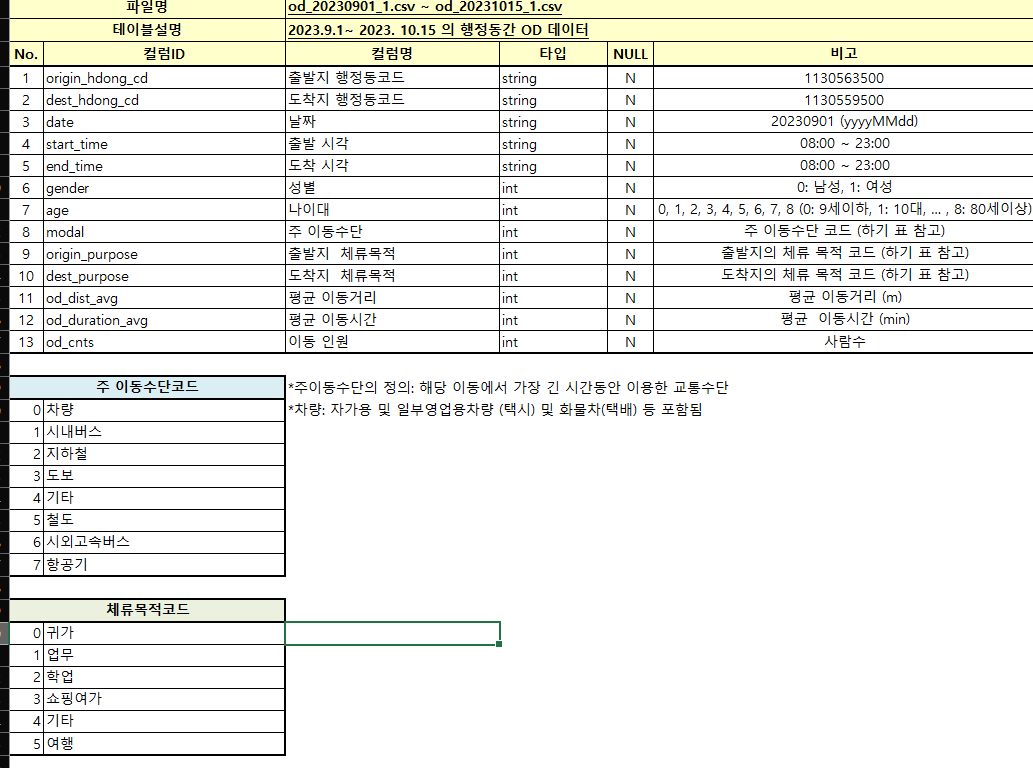

In [63]:
target

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts,행정동코드,시도명,시군구명,읍면동명
1252,1117051000,1114054000,2023-09-01,NaN,NaN,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1253,1117051000,1114054000,2023-09-01,NaN,NaN,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1254,1117051000,1114054000,2023-09-01,NaN,NaN,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1255,1117051000,1114054000,2023-09-01,NaN,NaN,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1256,1117051000,1114054000,2023-09-01,NaN,NaN,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12733936,1117053000,1114054000,2023-09-01,NaN,NaN,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동
12733937,1117053000,1114054000,2023-09-01,NaN,NaN,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동
12733938,1117053000,1114054000,2023-09-01,NaN,NaN,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동
12733939,1117053000,1114054000,2023-09-01,NaN,NaN,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동


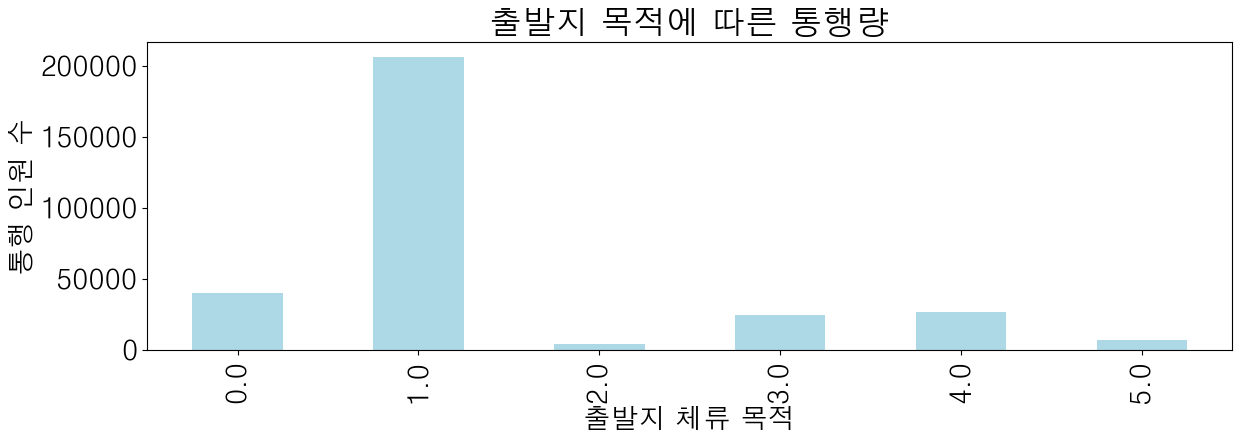

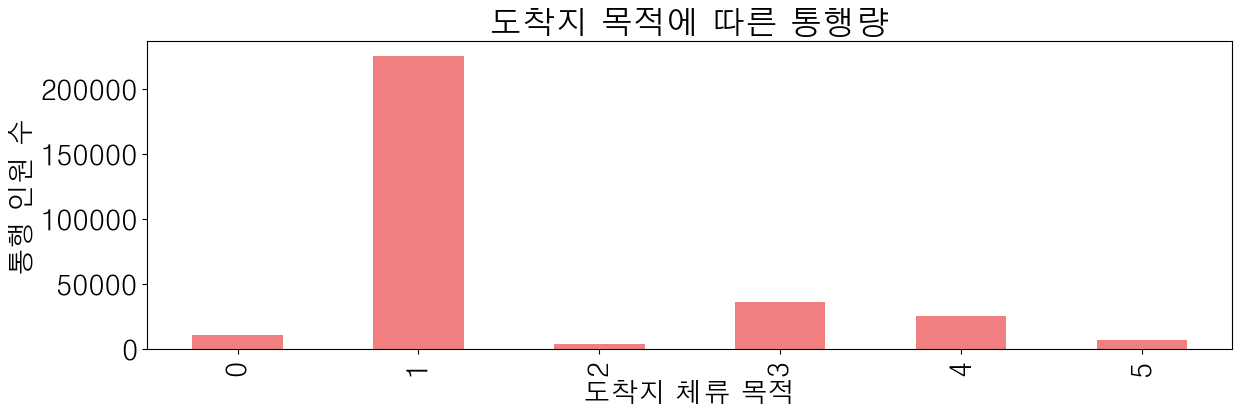

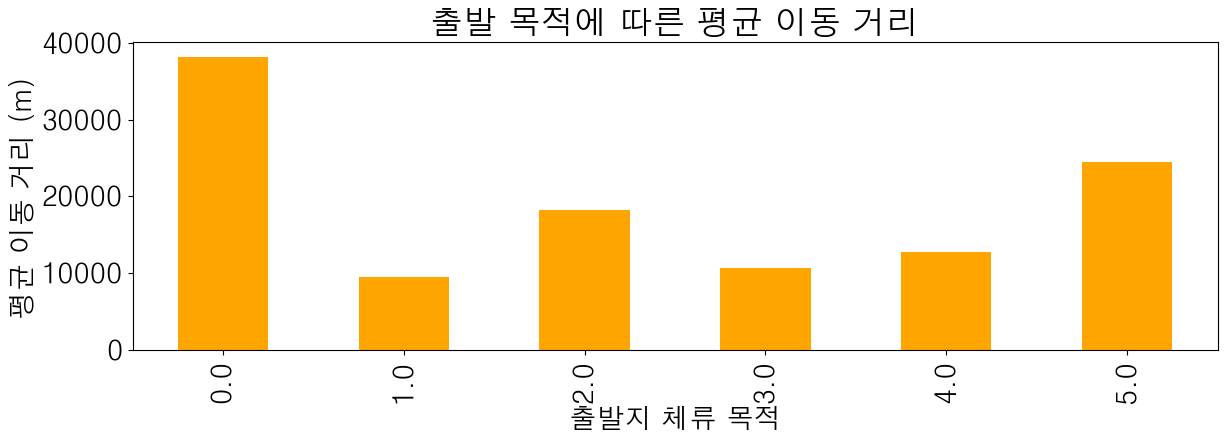

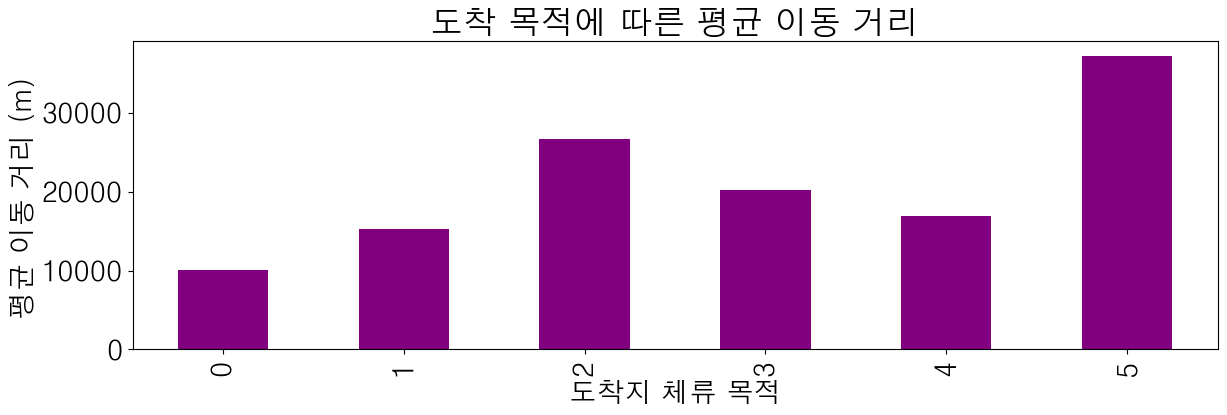

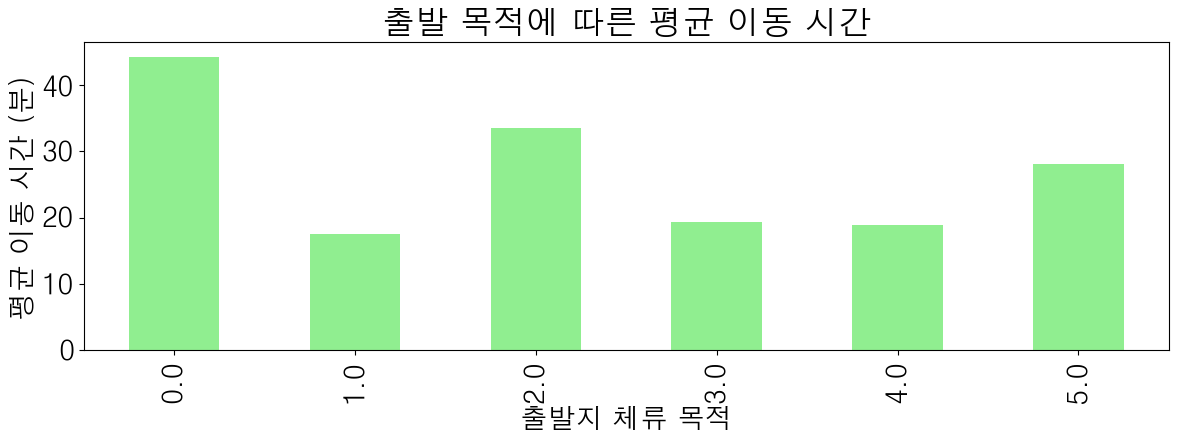

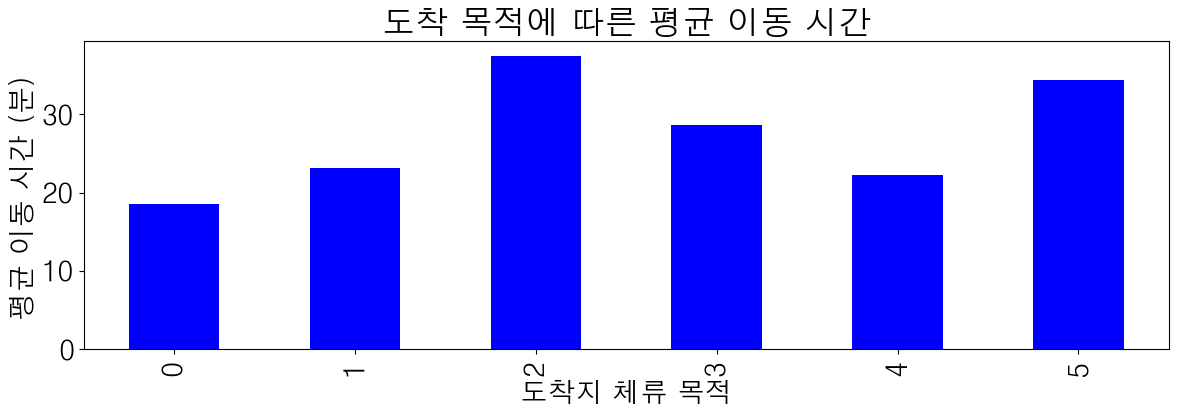

<Figure size 1400x400 with 0 Axes>

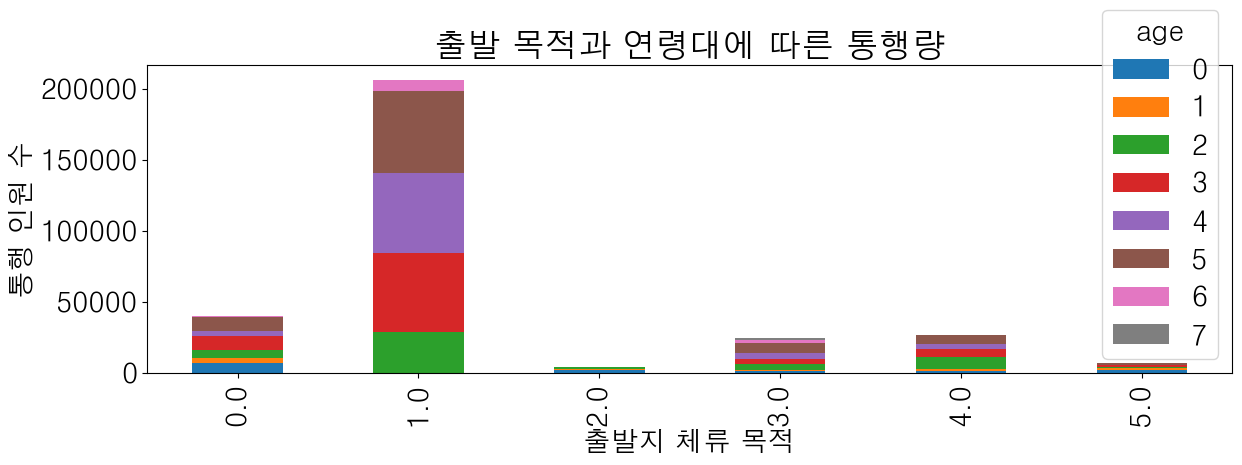

<Figure size 1400x400 with 0 Axes>

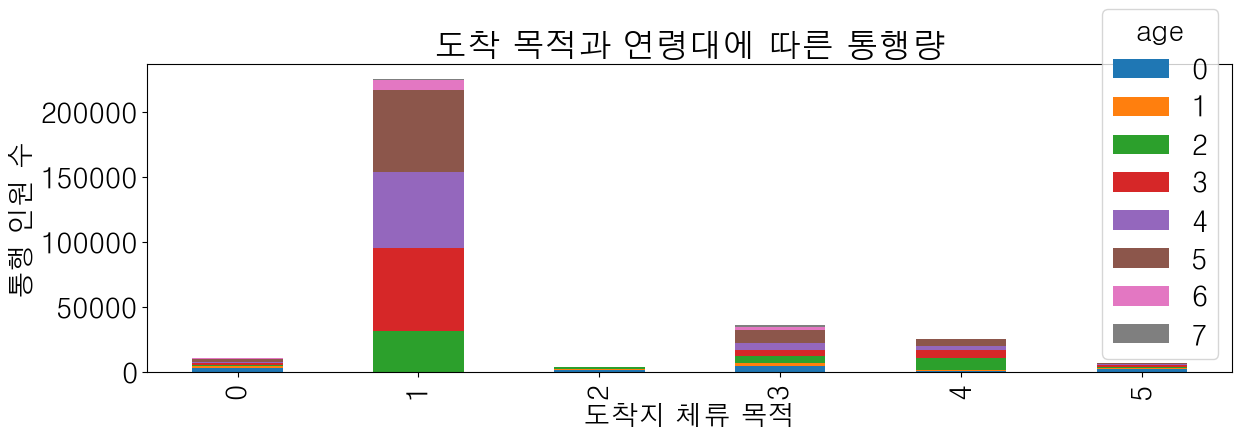

<Figure size 1400x400 with 0 Axes>

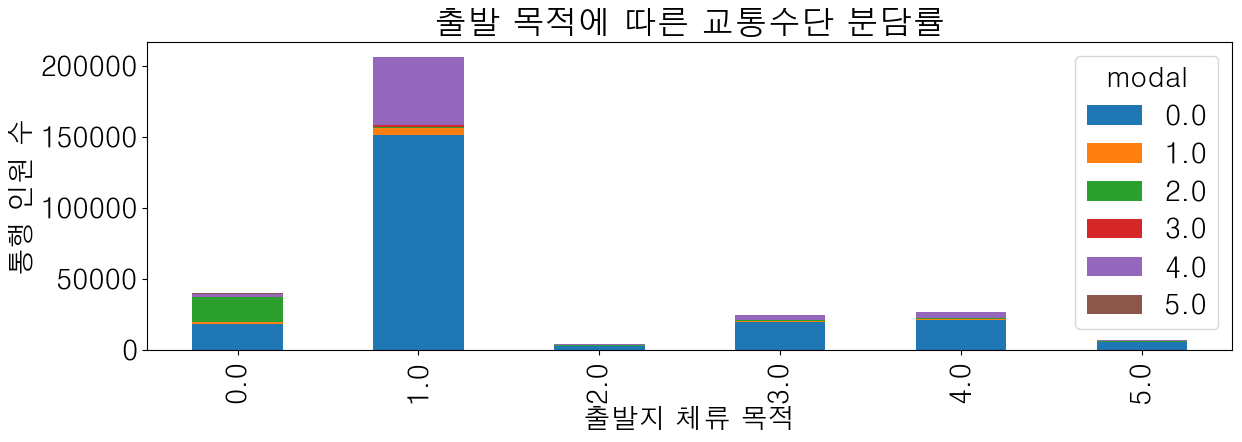

<Figure size 1400x400 with 0 Axes>

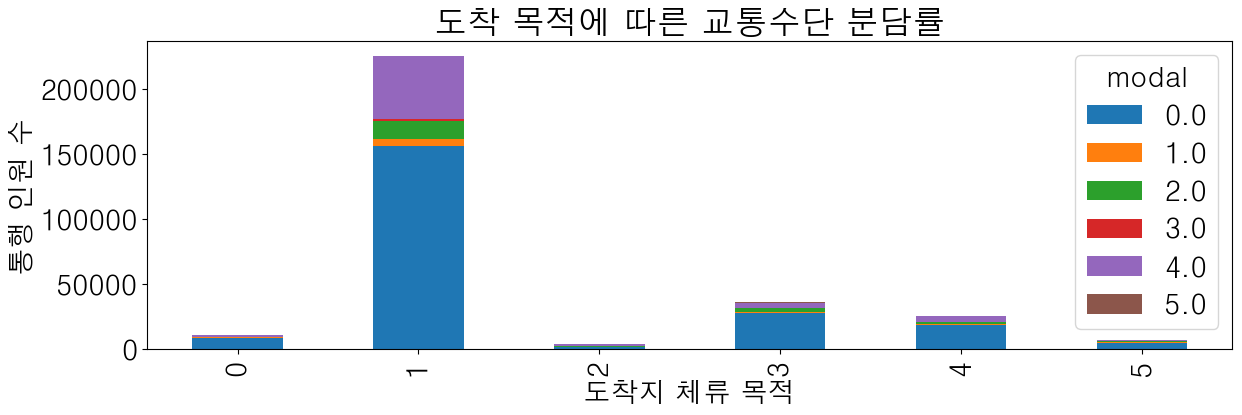

In [68]:
# 41. 출발지 목적별 통행량 분석
origin_purpose_flow = target.groupby('origin_purpose')['od_cnts'].sum()
plt.figure()
origin_purpose_flow.plot(kind='bar', color='lightblue', title='출발지 목적에 따른 통행량')
plt.ylabel('통행 인원 수')
plt.xlabel('출발지 체류 목적')
plt.show()

# 42. 도착지 목적별 통행량 분석
dest_purpose_flow = target.groupby('dest_purpose')['od_cnts'].sum()
plt.figure()
dest_purpose_flow.plot(kind='bar', color='lightcoral', title='도착지 목적에 따른 통행량')
plt.ylabel('통행 인원 수')
plt.xlabel('도착지 체류 목적')
plt.show()

# 43. 출발 목적에 따른 평균 이동 거리 분석
origin_purpose_dist = target.groupby('origin_purpose')['od_dist_avg'].mean()
plt.figure()
origin_purpose_dist.plot(kind='bar', color='orange', title='출발 목적에 따른 평균 이동 거리')
plt.ylabel('평균 이동 거리 (m)')
plt.xlabel('출발지 체류 목적')
plt.show()

# 44. 도착 목적에 따른 평균 이동 거리 분석
dest_purpose_dist = target.groupby('dest_purpose')['od_dist_avg'].mean()
plt.figure()
dest_purpose_dist.plot(kind='bar', color='purple', title='도착 목적에 따른 평균 이동 거리')
plt.ylabel('평균 이동 거리 (m)')
plt.xlabel('도착지 체류 목적')
plt.show()

# 45. 출발 목적에 따른 평균 이동 시간 분석
origin_purpose_duration = target.groupby('origin_purpose')['od_duration_avg'].mean()
plt.figure()
origin_purpose_duration.plot(kind='bar', color='lightgreen', title='출발 목적에 따른 평균 이동 시간')
plt.ylabel('평균 이동 시간 (분)')
plt.xlabel('출발지 체류 목적')
plt.show()

# 46. 도착 목적에 따른 평균 이동 시간 분석
dest_purpose_duration = target.groupby('dest_purpose')['od_duration_avg'].mean()
plt.figure()
dest_purpose_duration.plot(kind='bar', color='blue', title='도착 목적에 따른 평균 이동 시간')
plt.ylabel('평균 이동 시간 (분)')
plt.xlabel('도착지 체류 목적')
plt.show()

# 47. 출발 목적과 연령대 간의 상관관계 분석
origin_purpose_age_flow = target.groupby(['origin_purpose', 'age'])['od_cnts'].sum().unstack().fillna(0)
plt.figure()
origin_purpose_age_flow.plot(kind='bar', stacked=True, title='출발 목적과 연령대에 따른 통행량')
plt.ylabel('통행 인원 수')
plt.xlabel('출발지 체류 목적')
plt.show()

# 48. 도착 목적과 연령대 간의 상관관계 분석
dest_purpose_age_flow = target.groupby(['dest_purpose', 'age'])['od_cnts'].sum().unstack().fillna(0)
plt.figure()
dest_purpose_age_flow.plot(kind='bar', stacked=True, title='도착 목적과 연령대에 따른 통행량')
plt.ylabel('통행 인원 수')
plt.xlabel('도착지 체류 목적')
plt.show()

# 49. 출발 목적에 따른 교통수단 분담률 분석
origin_purpose_mode_share = target.groupby(['origin_purpose', 'modal'])['od_cnts'].sum().unstack().fillna(0)
plt.figure()
origin_purpose_mode_share.plot(kind='bar', stacked=True, title='출발 목적에 따른 교통수단 분담률')
plt.ylabel('통행 인원 수')
plt.xlabel('출발지 체류 목적')
plt.show()

# 50. 도착 목적에 따른 교통수단 분담률 분석
dest_purpose_mode_share = target.groupby(['dest_purpose', 'modal'])['od_cnts'].sum().unstack().fillna(0)
plt.figure()
dest_purpose_mode_share.plot(kind='bar', stacked=True, title='도착 목적에 따른 교통수단 분담률')
plt.ylabel('통행 인원 수')
plt.xlabel('도착지 체류 목적')
plt.show()


버전:  3.9.2
설치 위치:  c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\ansck\.matplotlib
캐시 위치:  C:\Users\ansck\.matplotlib
설정파일 위치:  c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\matplotlib\mpl-data\matplotlibrc
411


In [62]:
target

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts,행정동코드,시도명,시군구명,읍면동명
1252,1117051000,1114054000,2023-09-01,NaN,NaN,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1253,1117051000,1114054000,2023-09-01,NaN,NaN,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1254,1117051000,1114054000,2023-09-01,NaN,NaN,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1255,1117051000,1114054000,2023-09-01,NaN,NaN,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
1256,1117051000,1114054000,2023-09-01,NaN,NaN,1,3,0.0,0.0,0,13990,19,13,1.114054e+09,서울특별시,중구,회현동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12733936,1117053000,1114054000,2023-09-01,NaN,NaN,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동
12733937,1117053000,1114054000,2023-09-01,NaN,NaN,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동
12733938,1117053000,1114054000,2023-09-01,NaN,NaN,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동
12733939,1117053000,1114054000,2023-09-01,NaN,NaN,0,1,0.0,5.0,5,4865,12,5,1.114054e+09,서울특별시,중구,회현동


[('Copperplate Gothic Light', 'C:\\Windows\\Fonts\\COPRGTL.TTF'),
 ('Yu Gothic', 'C:\\Windows\\Fonts\\YuGothL.ttc'),
 ('HYGothic-Extra', 'C:\\Windows\\Fonts\\H2GTRE.TTF'),
 ('HYGothic-Medium', 'C:\\Windows\\Fonts\\H2GTRM.TTF'),
 ('AppleSDGothicNeoH00',
  'C:\\Users\\ansck\\AppData\\Local\\Microsoft\\Windows\\Fonts\\AppleSDGothicNeoH.ttf'),
 ('Franklin Gothic Medium', 'C:\\Windows\\Fonts\\framd.ttf'),
 ('Showcard Gothic', 'C:\\Windows\\Fonts\\SHOWG.TTF'),
 ('AppleSDGothicNeoEB00',
  'C:\\Users\\ansck\\AppData\\Local\\Microsoft\\Windows\\Fonts\\AppleSDGothicNeoEB.ttf'),
 ('Franklin Gothic Medium Cond', 'C:\\Windows\\Fonts\\FRAMDCN.TTF'),
 ('Franklin Gothic Demi', 'C:\\Windows\\Fonts\\FRADM.TTF'),
 ('Century Gothic', 'C:\\Windows\\Fonts\\GOTHICB.TTF'),
 ('Franklin Gothic Book', 'C:\\Windows\\Fonts\\FRABKIT.TTF'),
 ('Franklin Gothic Heavy', 'C:\\Windows\\Fonts\\FRAHVIT.TTF'),
 ('AppleSDGothicNeoM00',
  'C:\\Users\\ansck\\AppData\\Local\\Microsoft\\Windows\\Fonts\\AppleSDGothicNeoM.ttf'),
 

In [47]:

plt.rcParams["font.family"] = 'HYGothic-Medium'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14,4)

쇼핑/여가 목적의 전체 통행량: 39050


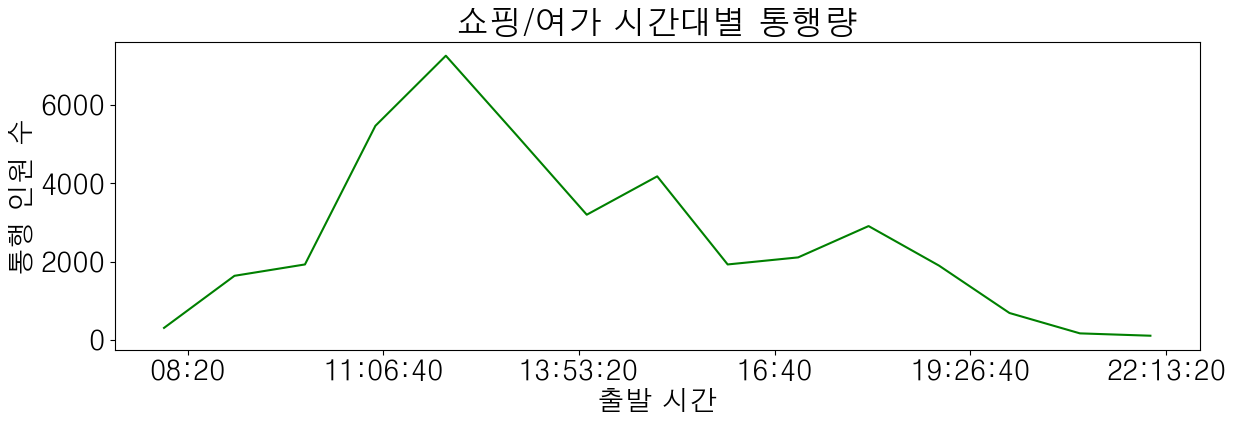

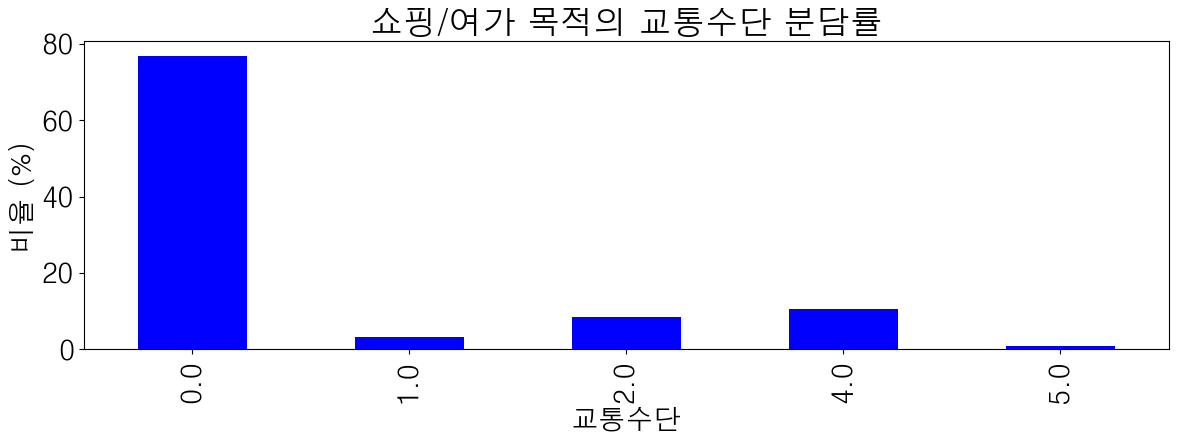

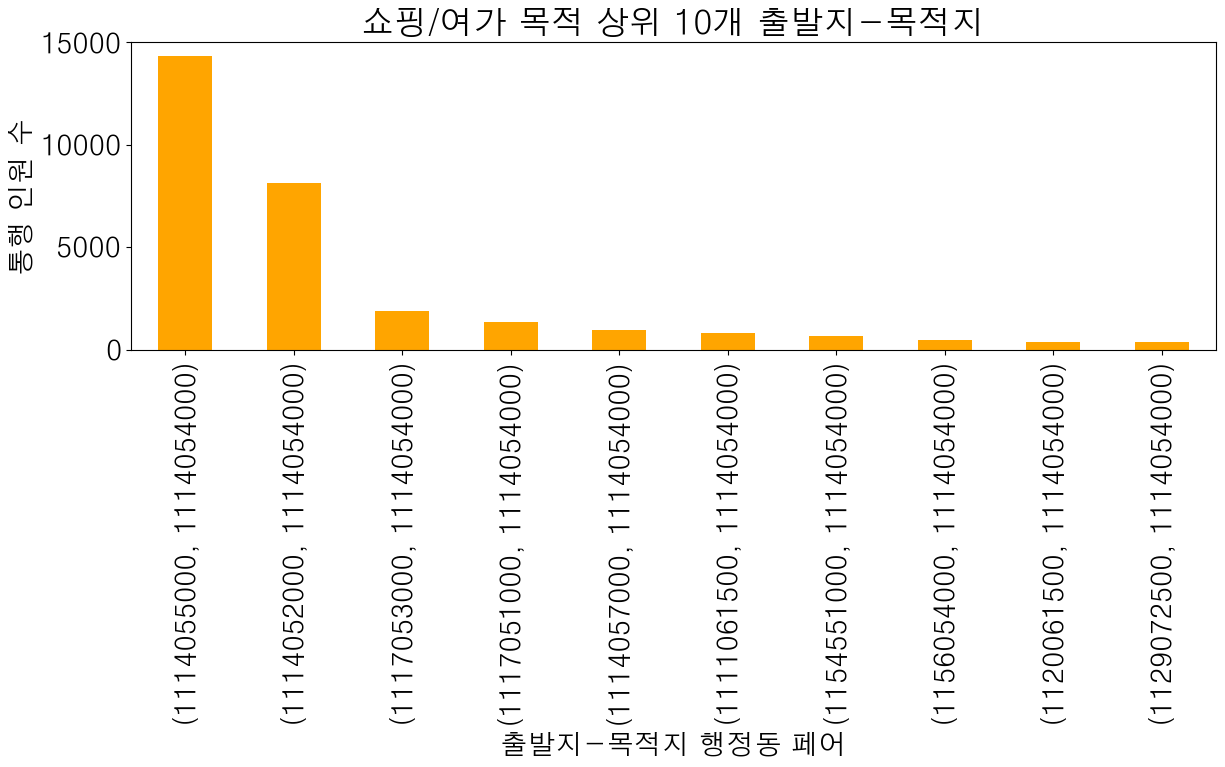

쇼핑/여가 목적의 평균 이동 거리: 20043.964656964657 m
쇼핑/여가 목적의 평균 이동 시간: 28.683991683991685 분


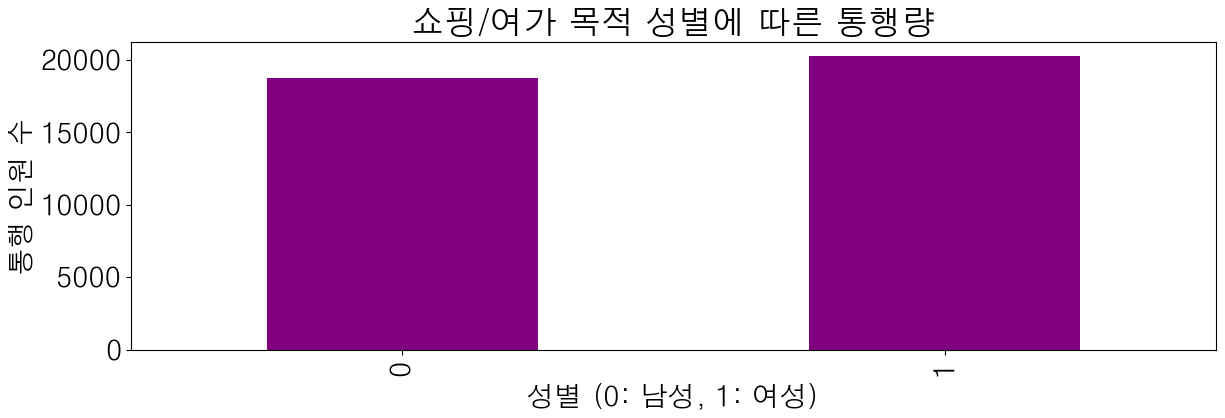

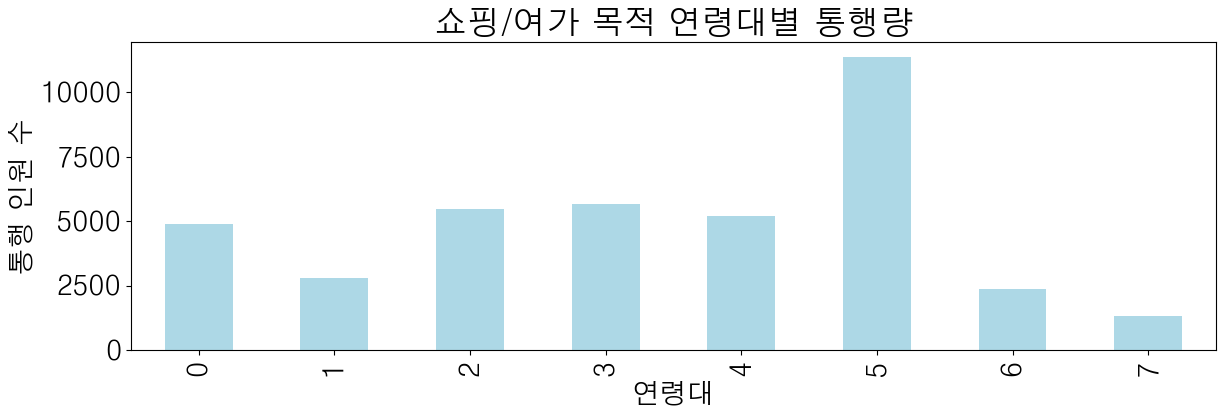

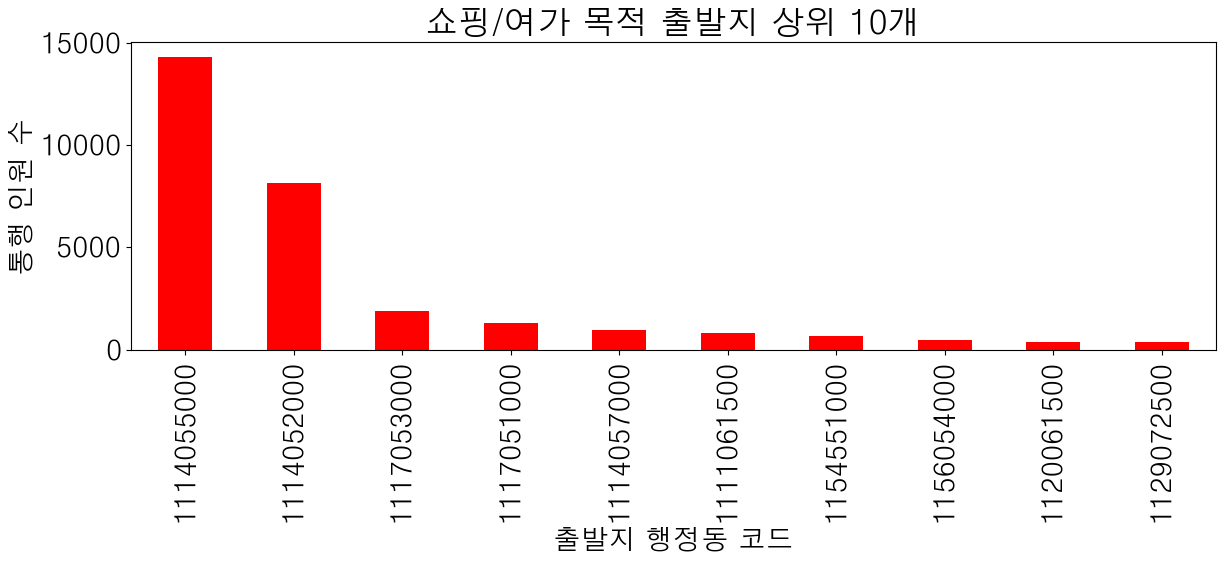

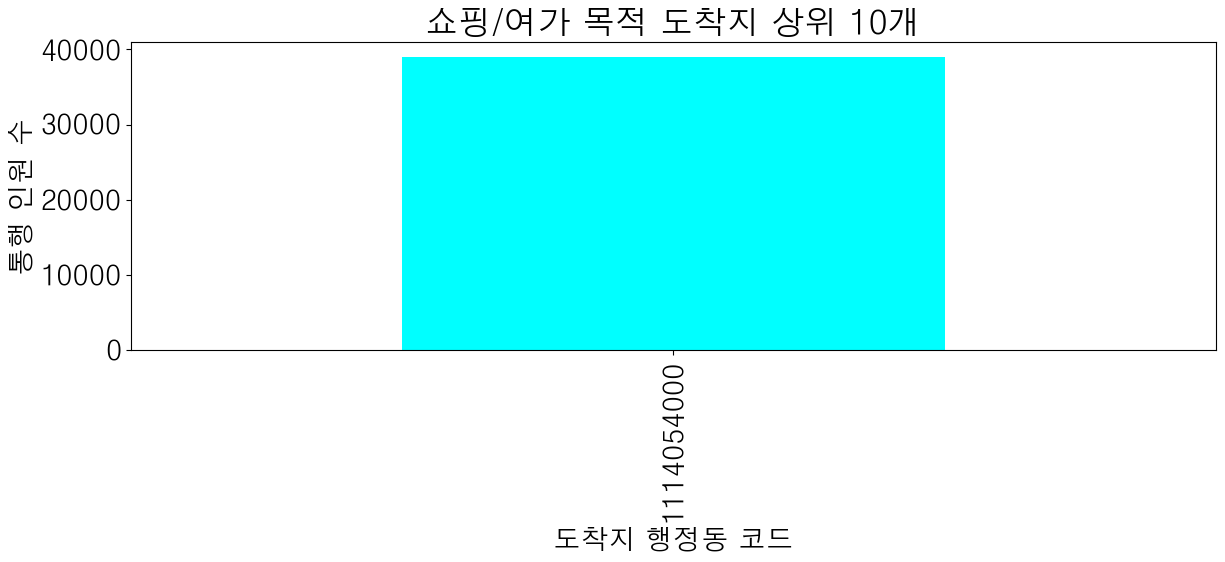

In [69]:
# '쇼핑/여가' 목적인 데이터 필터링
shopping_leisure = target[(target['origin_purpose'] == 3) | (target['dest_purpose'] == 3)]

# 1. 쇼핑/여가 목적의 전체 통행량 분석
total_shopping_leisure_flow = shopping_leisure['od_cnts'].sum()
print(f"쇼핑/여가 목적의 전체 통행량: {total_shopping_leisure_flow}")

# 2. 쇼핑/여가 목적의 시간대별 통행량 분석
shopping_time_flow = shopping_leisure.groupby('start_time')['od_cnts'].sum()
plt.figure()
shopping_time_flow.plot(kind='line', color='green', title='쇼핑/여가 시간대별 통행량')
plt.ylabel('통행 인원 수')
plt.xlabel('출발 시간')
plt.show()

# 3. 쇼핑/여가 목적의 교통수단 분담률 분석
shopping_mode_share = shopping_leisure.groupby('modal')['od_cnts'].sum() / shopping_leisure['od_cnts'].sum() * 100
plt.figure()
shopping_mode_share.plot(kind='bar', color='blue', title='쇼핑/여가 목적의 교통수단 분담률')
plt.ylabel('비율 (%)')
plt.xlabel('교통수단')
plt.show()

# 4. 쇼핑/여가 목적의 출발지/목적지 행정동 분석
shopping_origin_dest_flow = shopping_leisure.groupby(['origin_hdong_cd', 'dest_hdong_cd'])['od_cnts'].sum().nlargest(10)
plt.figure()
shopping_origin_dest_flow.plot(kind='bar', color='orange', title='쇼핑/여가 목적 상위 10개 출발지-목적지')
plt.ylabel('통행 인원 수')
plt.xlabel('출발지-목적지 행정동 페어')
plt.show()

# 5. 쇼핑/여가 목적의 평균 이동 거리 분석
avg_shopping_distance = shopping_leisure['od_dist_avg'].mean()
print(f"쇼핑/여가 목적의 평균 이동 거리: {avg_shopping_distance} m")

# 6. 쇼핑/여가 목적의 평균 이동 시간 분석
avg_shopping_duration = shopping_leisure['od_duration_avg'].mean()
print(f"쇼핑/여가 목적의 평균 이동 시간: {avg_shopping_duration} 분")

# 7. 쇼핑/여가 목적의 성별에 따른 통행량 분석
shopping_gender_flow = shopping_leisure.groupby('gender')['od_cnts'].sum()
plt.figure()
shopping_gender_flow.plot(kind='bar', color='purple', title='쇼핑/여가 목적 성별에 따른 통행량')
plt.ylabel('통행 인원 수')
plt.xlabel('성별 (0: 남성, 1: 여성)')
plt.show()

# 8. 쇼핑/여가 목적의 연령대별 통행량 분석
shopping_age_flow = shopping_leisure.groupby('age')['od_cnts'].sum()
plt.figure()
shopping_age_flow.plot(kind='bar', color='lightblue', title='쇼핑/여가 목적 연령대별 통행량')
plt.ylabel('통행 인원 수')
plt.xlabel('연령대')
plt.show()

# 9. 쇼핑/여가 목적의 출발지별 이동 패턴 분석
shopping_origin_flow = shopping_leisure.groupby('origin_hdong_cd')['od_cnts'].sum().nlargest(10)
plt.figure()
shopping_origin_flow.plot(kind='bar', color='red', title='쇼핑/여가 목적 출발지 상위 10개')
plt.ylabel('통행 인원 수')
plt.xlabel('출발지 행정동 코드')
plt.show()

# 10. 쇼핑/여가 목적의 도착지별 이동 패턴 분석
shopping_dest_flow = shopping_leisure.groupby('dest_hdong_cd')['od_cnts'].sum().nlargest(10)
plt.figure()
shopping_dest_flow.plot(kind='bar', color='cyan', title='쇼핑/여가 목적 도착지 상위 10개')
plt.ylabel('통행 인원 수')
plt.xlabel('도착지 행정동 코드')
plt.show()


쇼핑/여가 목적의 전체 통행량: 39050


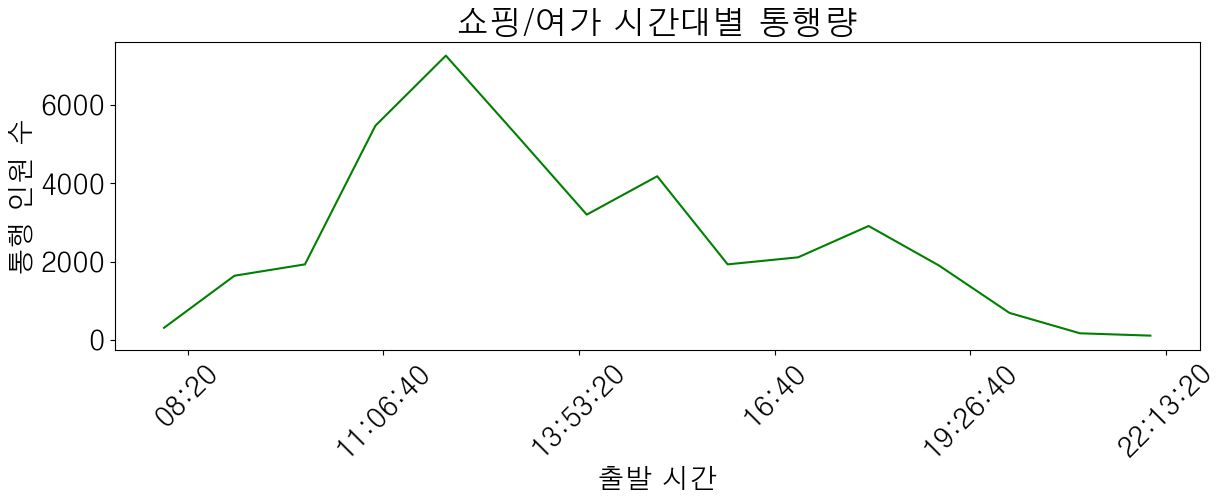

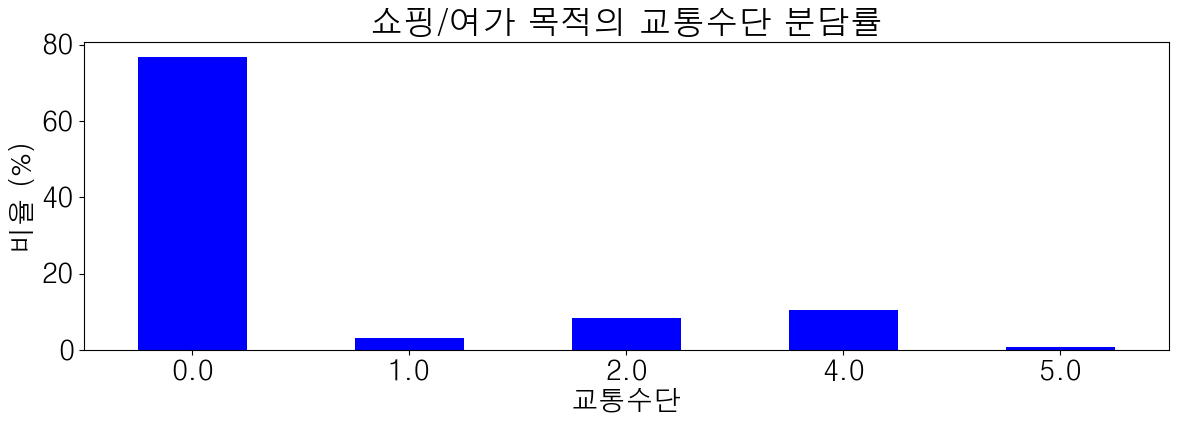

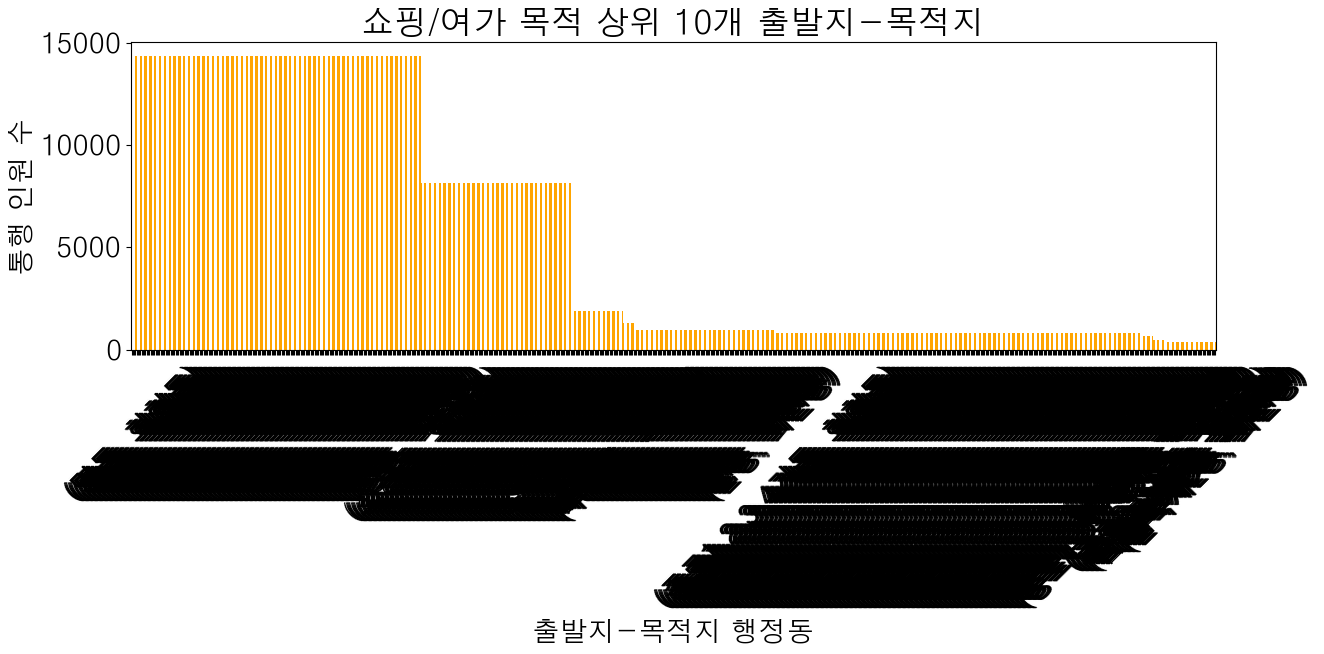

쇼핑/여가 목적의 평균 이동 거리: 20043.96 m
쇼핑/여가 목적의 평균 이동 시간: 28.68 분


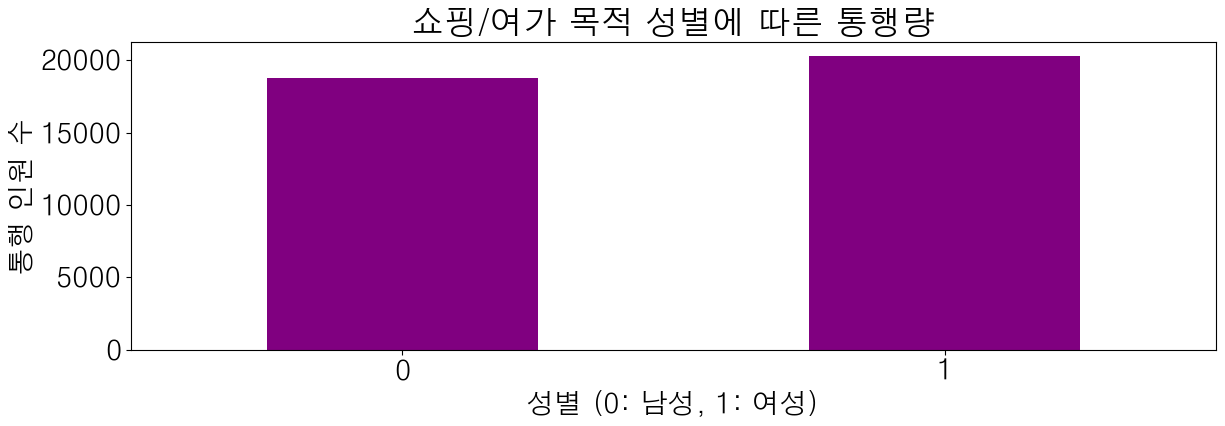

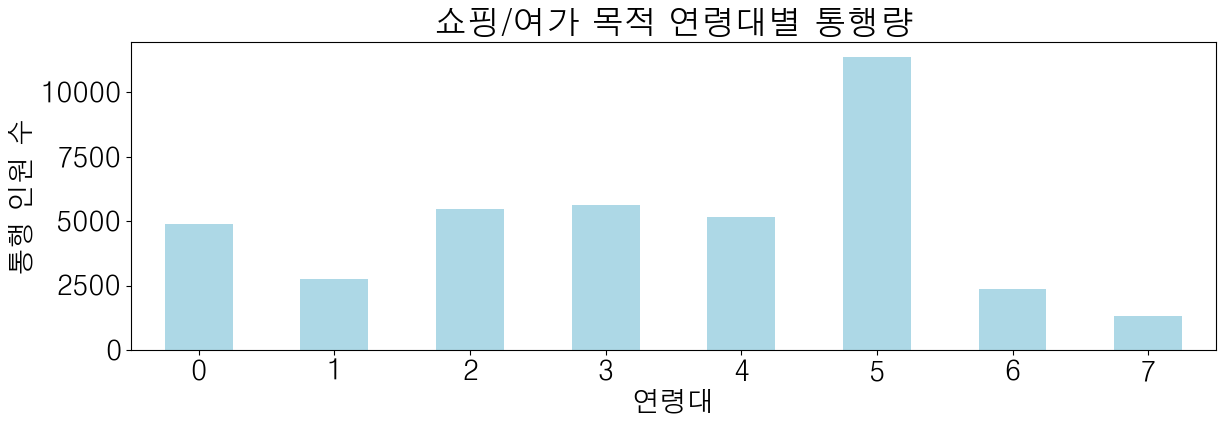

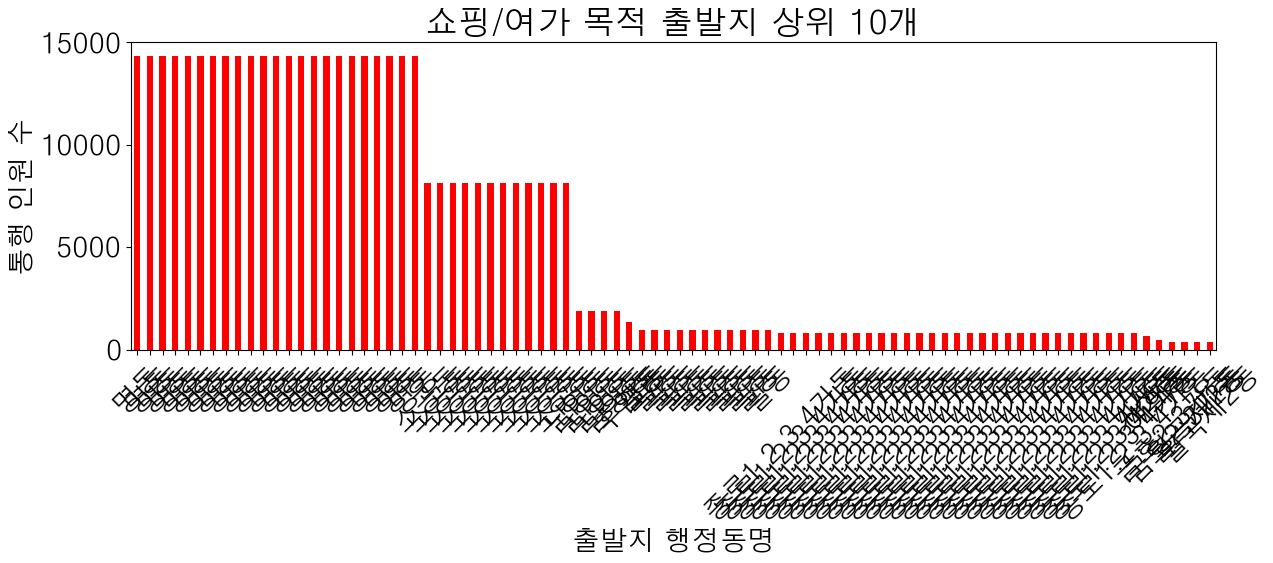

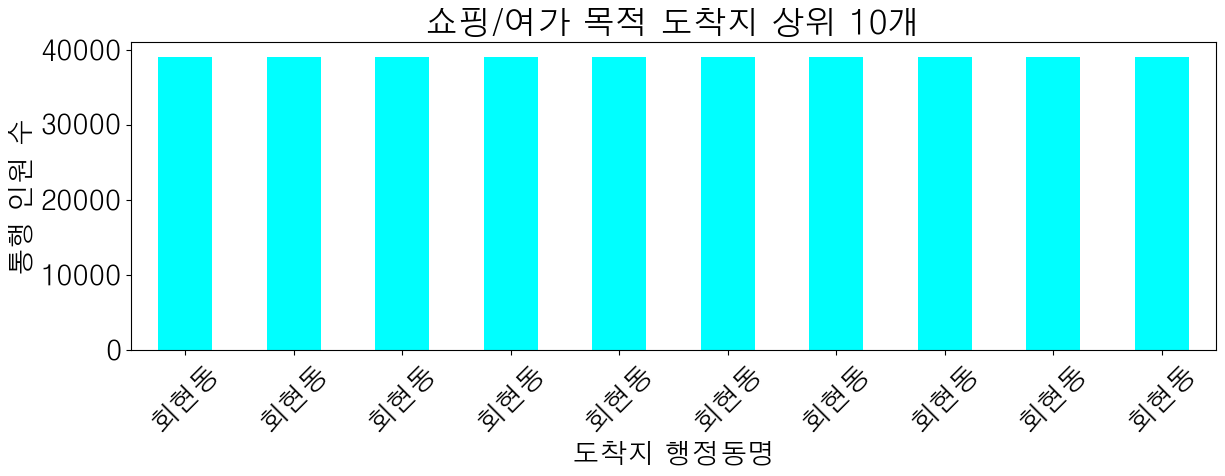

In [70]:
# '쇼핑/여가' 목적인 데이터 필터링 (origin_purpose 또는 dest_purpose가 3인 경우)
shopping_leisure = target[(target['origin_purpose'] == 3) | (target['dest_purpose'] == 3)]

# 1. 쇼핑/여가 목적의 전체 통행량 분석
total_shopping_leisure_flow = shopping_leisure['od_cnts'].sum()
print(f"쇼핑/여가 목적의 전체 통행량: {total_shopping_leisure_flow}")

# 2. 쇼핑/여가 목적의 시간대별 통행량 분석 (start_time을 기준으로)
shopping_time_flow = shopping_leisure.groupby('start_time')['od_cnts'].sum()
plt.figure()
shopping_time_flow.plot(kind='line', color='green', title='쇼핑/여가 시간대별 통행량')
plt.ylabel('통행 인원 수')
plt.xlabel('출발 시간')
plt.xticks(rotation=45)
plt.show()

# 3. 쇼핑/여가 목적의 교통수단 분담률 분석
shopping_mode_share = shopping_leisure.groupby('modal')['od_cnts'].sum() / shopping_leisure['od_cnts'].sum() * 100
plt.figure()
shopping_mode_share.plot(kind='bar', color='blue', title='쇼핑/여가 목적의 교통수단 분담률')
plt.ylabel('비율 (%)')
plt.xlabel('교통수단')
plt.xticks(rotation=0)
plt.show()

# 4. 쇼핑/여가 목적의 상위 10개 출발지-목적지 행정동 분석 (행정동 한글 이름 매핑)
shopping_origin_dest_flow = shopping_leisure.groupby(['origin_hdong_cd', 'dest_hdong_cd'])['od_cnts'].sum().nlargest(10).reset_index()

# 행정동 이름 매핑 (한글 읍면동명 추가)
shopping_origin_dest_flow = pd.merge(shopping_origin_dest_flow, dong_code[['행정동코드', '읍면동명']], left_on='origin_hdong_cd', right_on='행정동코드', how='left')
shopping_origin_dest_flow = pd.merge(shopping_origin_dest_flow, dong_code[['행정동코드', '읍면동명']], left_on='dest_hdong_cd', right_on='행정동코드', suffixes=('_origin', '_dest'), how='left')

# 시각화
plt.figure()
shopping_origin_dest_flow.set_index(['읍면동명_origin', '읍면동명_dest'])['od_cnts'].plot(kind='bar', color='orange', title='쇼핑/여가 목적 상위 10개 출발지-목적지')
plt.ylabel('통행 인원 수')
plt.xlabel('출발지-목적지 행정동')
plt.xticks(rotation=45)
plt.show()

# 5. 쇼핑/여가 목적의 평균 이동 거리 분석
avg_shopping_distance = shopping_leisure['od_dist_avg'].mean()
print(f"쇼핑/여가 목적의 평균 이동 거리: {avg_shopping_distance:.2f} m")

# 6. 쇼핑/여가 목적의 평균 이동 시간 분석
avg_shopping_duration = shopping_leisure['od_duration_avg'].mean()
print(f"쇼핑/여가 목적의 평균 이동 시간: {avg_shopping_duration:.2f} 분")

# 7. 쇼핑/여가 목적의 성별에 따른 통행량 분석
shopping_gender_flow = shopping_leisure.groupby('gender')['od_cnts'].sum()
plt.figure()
shopping_gender_flow.plot(kind='bar', color='purple', title='쇼핑/여가 목적 성별에 따른 통행량')
plt.ylabel('통행 인원 수')
plt.xlabel('성별 (0: 남성, 1: 여성)')
plt.xticks(rotation=0)
plt.show()

# 8. 쇼핑/여가 목적의 연령대별 통행량 분석
shopping_age_flow = shopping_leisure.groupby('age')['od_cnts'].sum()
plt.figure()
shopping_age_flow.plot(kind='bar', color='lightblue', title='쇼핑/여가 목적 연령대별 통행량')
plt.ylabel('통행 인원 수')
plt.xlabel('연령대')
plt.xticks(rotation=0)
plt.show()

# 9. 쇼핑/여가 목적의 출발지별 이동 패턴 분석 (상위 10개 출발지 행정동)
shopping_origin_flow = shopping_leisure.groupby('origin_hdong_cd')['od_cnts'].sum().nlargest(10).reset_index()

# 행정동 이름 매핑 (출발지 한글 이름 추가)
shopping_origin_flow = pd.merge(shopping_origin_flow, dong_code[['행정동코드', '읍면동명']], left_on='origin_hdong_cd', right_on='행정동코드', how='left')

# 시각화
plt.figure()
shopping_origin_flow.set_index('읍면동명')['od_cnts'].plot(kind='bar', color='red', title='쇼핑/여가 목적 출발지 상위 10개')
plt.ylabel('통행 인원 수')
plt.xlabel('출발지 행정동명')
plt.xticks(rotation=45)
plt.show()

# 10. 쇼핑/여가 목적의 도착지별 이동 패턴 분석 (상위 10개 도착지 행정동)
shopping_dest_flow = shopping_leisure.groupby('dest_hdong_cd')['od_cnts'].sum().nlargest(10).reset_index()

# 행정동 이름 매핑 (도착지 한글 이름 추가)
shopping_dest_flow = pd.merge(shopping_dest_flow, dong_code[['행정동코드', '읍면동명']], left_on='dest_hdong_cd', right_on='행정동코드', how='left')

# 시각화
plt.figure()
shopping_dest_flow.set_index('읍면동명')['od_cnts'].plot(kind='bar', color='cyan', title='쇼핑/여가 목적 도착지 상위 10개')
plt.ylabel('통행 인원 수')
plt.xlabel('도착지 행정동명')
plt.xticks(rotation=45)
plt.show()


In [75]:
import pandas as pd

# 전통시장 목적지 필터링 (예: 전통시장이 있는 특정 행정동 코드를 지정)
market_dest_code = 1114054000  # 예시: 회현동에 위치한 전통시장
market_travel = target[target['dest_hdong_cd'] == market_dest_code]

# 1. 교통수단 분담률 분석
market_mode_share = market_travel.groupby('modal')['od_cnts'].sum() / market_travel['od_cnts'].sum() * 100
print("교통수단 분담률 (상위 5개):")
print(market_mode_share.nlargest(5))

# 2. 성별 + 연령대 + 목적에 따른 통행량 분석 (쇼핑/여가 목적 필터링)
shopping_leisure = market_travel[(market_travel['origin_purpose'] == 3) | (market_travel['dest_purpose'] == 3)]
gender_age_purpose_flow = shopping_leisure.groupby(['gender', 'age'])['od_cnts'].sum().unstack().fillna(0)
print("성별과 연령대에 따른 쇼핑/여가 목적 통행량 (상위 5개):")
print(gender_age_purpose_flow.head(5))

# 3. 출발지 + 교통수단 분담률 분석
market_origin_mode_share = market_travel.groupby(['origin_hdong_cd', 'modal'])['od_cnts'].sum().unstack().fillna(0)


# 4. 성별 + 교통수단 분담률 분석
market_gender_mode_share = market_travel.groupby(['gender', 'modal'])['od_cnts'].sum().unstack().fillna(0)
market_gender_mode_share_sum = market_gender_mode_share.div(market_gender_mode_share.sum(axis=1), axis=0) * 100
print("성별에 따른 교통수단 분담률:")
print(market_gender_mode_share_sum)

# 행정동 이름 매핑 (출발지 한글 이름 추가)
market_origin_mode_share = pd.merge(market_origin_mode_share.reset_index(), dong_code[['행정동코드', '읍면동명']], left_on='origin_hdong_cd', right_on='행정동코드', how='left')


교통수단 분담률 (상위 5개):
modal
0.0    70.743119
4.0    19.357233
2.0     6.382498
1.0     2.613662
3.0     0.542093
Name: od_cnts, dtype: float64
성별과 연령대에 따른 쇼핑/여가 목적 통행량 (상위 5개):
age        0     1     2     3     4     5     6     7
gender                                                
0       2660  2300  1360  1810  3340  6840   420    50
1       2240   480  4110  3840  1840  4540  1940  1280
성별에 따른 교통수단 분담률:
modal         0.0       1.0       2.0       3.0        4.0       5.0
gender                                                              
0       73.240495  2.467352  4.478216  0.589391  18.872067  0.352479
1       67.584947  2.798685  8.790647  0.482280  19.970771  0.372671


수단별 총 통행수:
modal
0.0    47301
1.0     1864
2.0     6955
3.0      462
4.0    12507
5.0      427
Name: od_cnts, dtype: int64


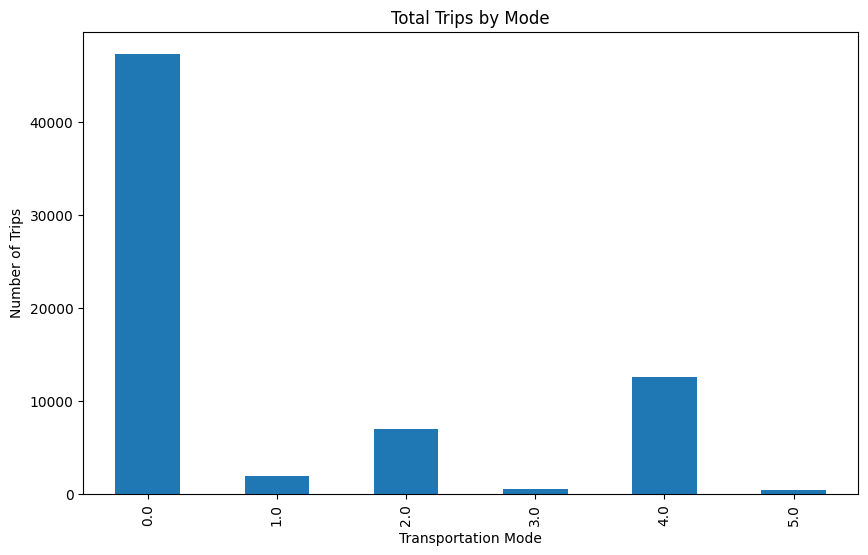

In [35]:

# 3. 수단별 총 통행수
total_trips_by_mode = target.groupby('modal')['od_cnts'].sum()

# 수단별 총 통행수 출력 및 시각화
print("수단별 총 통행수:")
print(total_trips_by_mode)

# 수단별 총 통행수 시각화
plt.figure(figsize=(10,6))
total_trips_by_mode.plot(kind='bar', title='Total Trips by Mode')
plt.ylabel('Number of Trips')
plt.xlabel('Transportation Mode')
plt.show()

시간별 유동인구 (회현동 도착 기준):
start_time
08:00    2316
09:00    1893
10:00    1908
11:00    5538
12:00    6018
13:00    3173
14:00    2244
15:00    2205
16:00    1856
17:00    1314
18:00    1320
19:00     592
20:00     364
21:00     178
22:00      72
Name: od_cnts, dtype: int64


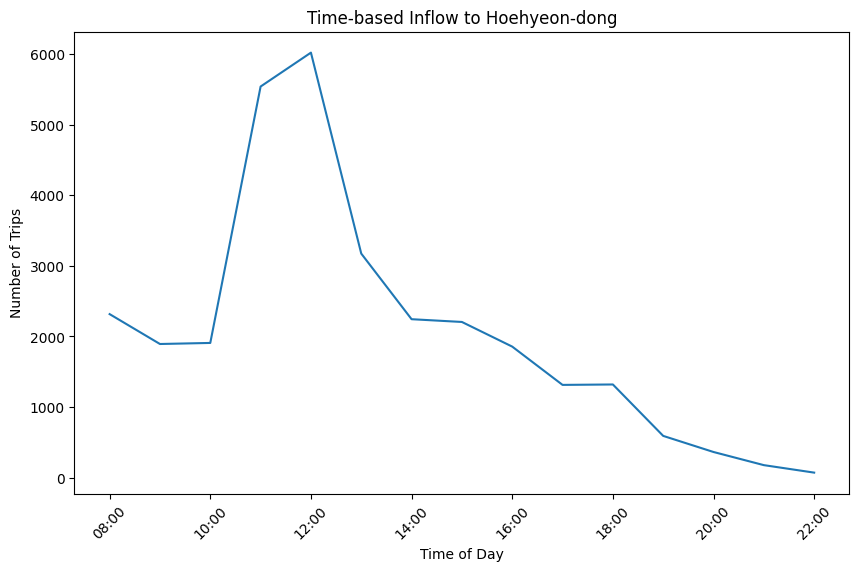

In [36]:

# 4. 시간별 유동인구 (회현동 도착 기준)
time_based_inflow = hoehyeon_inflow.groupby('start_time')['od_cnts'].sum()

# 시간별 유동인구 출력 및 시각화
print("시간별 유동인구 (회현동 도착 기준):")
print(time_based_inflow)

# 시간별 유동인구 시각화
plt.figure(figsize=(10,6))
time_based_inflow.plot(kind='line', title='Time-based Inflow to Hoehyeon-dong')
plt.ylabel('Number of Trips')
plt.xlabel('Time of Day')
plt.xticks(rotation=45)
plt.show()

이용 그룹별 통행수 (age 그룹별):
age
0     2610
1     1555
2     9779
3    19052
4    18351
5    15221
6     2485
7      445
8       18
Name: od_cnts, dtype: int64


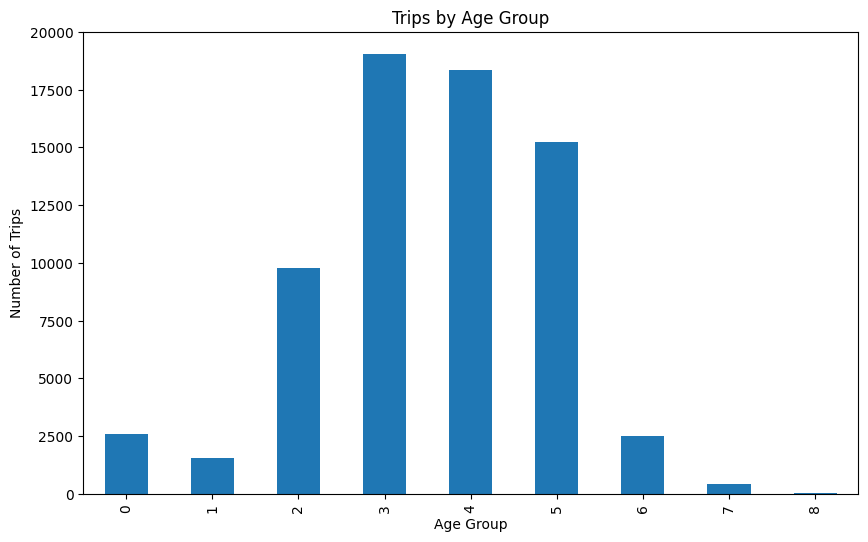

In [37]:

# 5. 이용 그룹별 통행수 (age 그룹별)
trips_by_age_group = target.groupby('age')['od_cnts'].sum()

# 이용 그룹별 통행수 출력 및 시각화
print("이용 그룹별 통행수 (age 그룹별):")
print(trips_by_age_group)

# 이용 그룹별 통행수 시각화
plt.figure(figsize=(10,6))
trips_by_age_group.plot(kind='bar', title='Trips by Age Group')
plt.ylabel('Number of Trips')
plt.xlabel('Age Group')
plt.show()

유입동별 통행수 (origin 행정동별):
origin_hdong_cd
1111051500     10
1111053000     56
1111056000     18
1111058000    114
1111061500    131
             ... 
4161056000      5
4161061000      5
4163034000      6
4183040000     10
4413356600     28
Name: od_cnts, Length: 285, dtype: int64


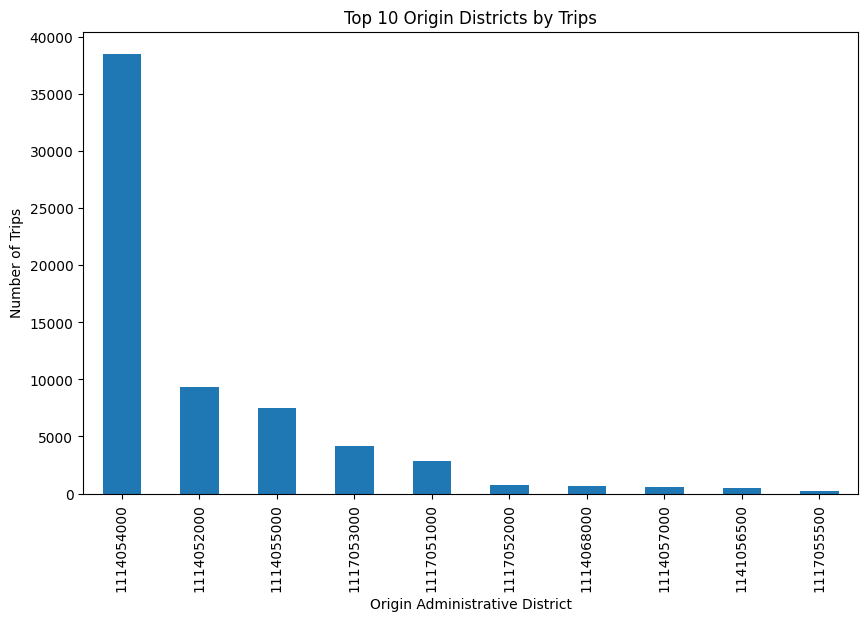

In [38]:

# 6. 유입동별 통행수 (origin 행정동별)
trips_by_origin_hdong = target.groupby('origin_hdong_cd')['od_cnts'].sum()

# 유입동별 통행수 출력 및 시각화
print("유입동별 통행수 (origin 행정동별):")
print(trips_by_origin_hdong)

# 유입동별 통행수 상위 10개만 시각화
plt.figure(figsize=(10,6))
trips_by_origin_hdong.nlargest(10).plot(kind='bar', title='Top 10 Origin Districts by Trips')
plt.ylabel('Number of Trips')
plt.xlabel('Origin Administrative District')
plt.show()


유입동별 통행수 (origin 행정동별):
origin_hdong_cd
1111051500     10
1111053000     56
1111056000     18
1111058000    114
1111061500    131
             ... 
4161056000      5
4161061000      5
4163034000      6
4183040000     10
4413356600     28
Name: od_cnts, Length: 285, dtype: int64


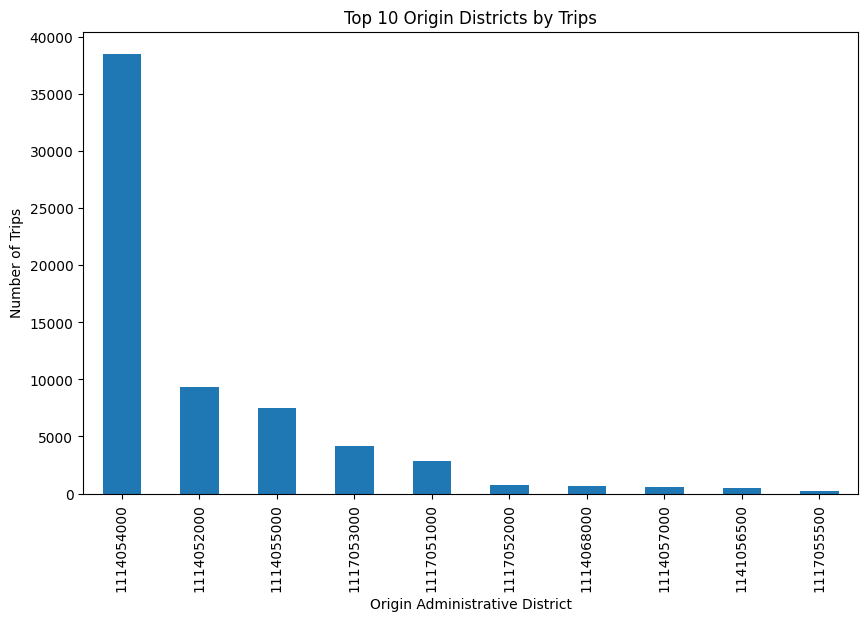

Destination 기준 시간별 유입량:
start_time
08:00    2316
09:00    1893
10:00    1908
11:00    5538
12:00    6018
13:00    3173
14:00    2244
15:00    2205
16:00    1856
17:00    1314
18:00    1320
19:00     592
20:00     364
21:00     178
22:00      72
Name: od_cnts, dtype: int64


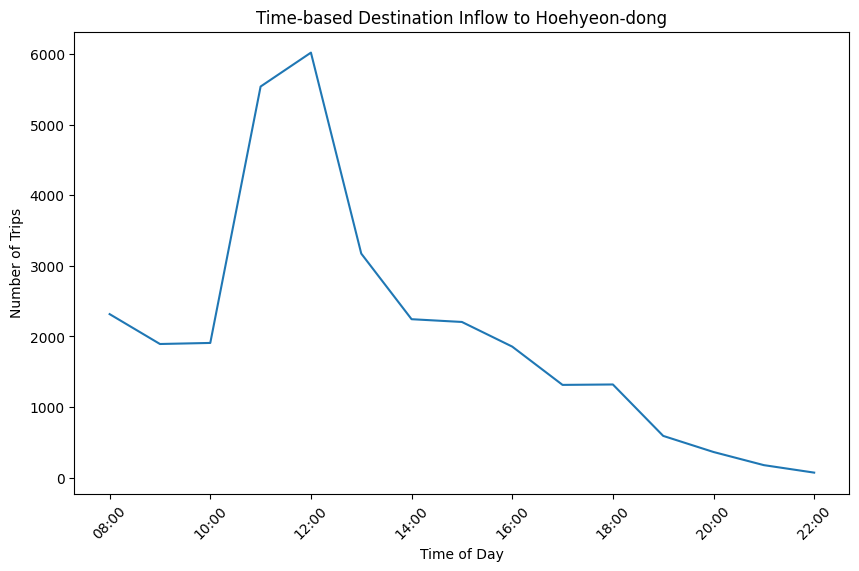

Destination 기준 travel time (평균 이동시간):
dest_hdong_cd
1111051500     42.823529
1111053000     20.125000
1111054000     36.809524
1111055000     56.750000
1111060000     45.000000
                 ...    
4825062000    243.000000
5113054200    187.000000
5115066500    235.000000
5117063000    259.500000
5175033000    215.000000
Name: od_duration_avg, Length: 527, dtype: float64


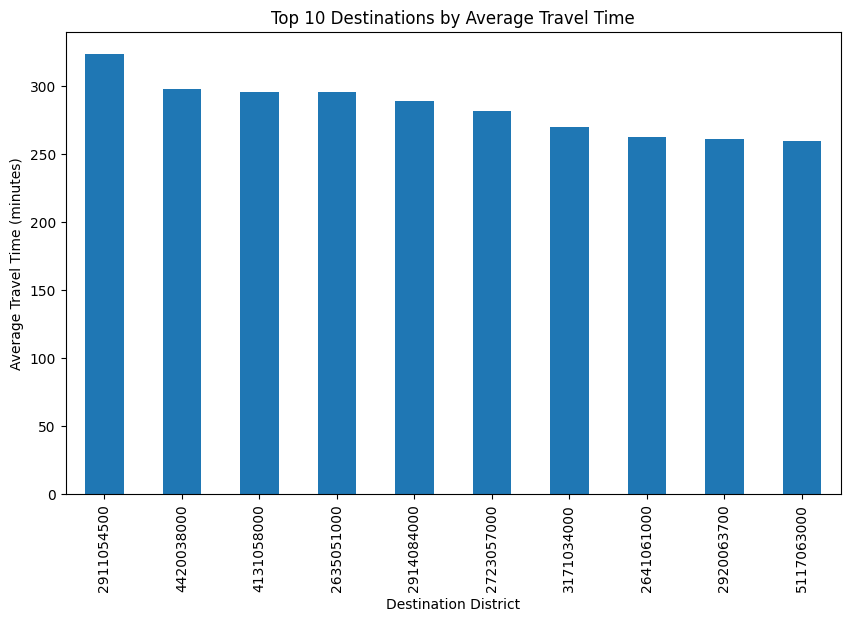

수단에 따른 평균 이동시간:
modal
0.0    33.565862
1.0    29.367347
2.0    62.100469
3.0    14.033333
4.0     7.651185
5.0    83.262295
Name: od_duration_avg, dtype: float64


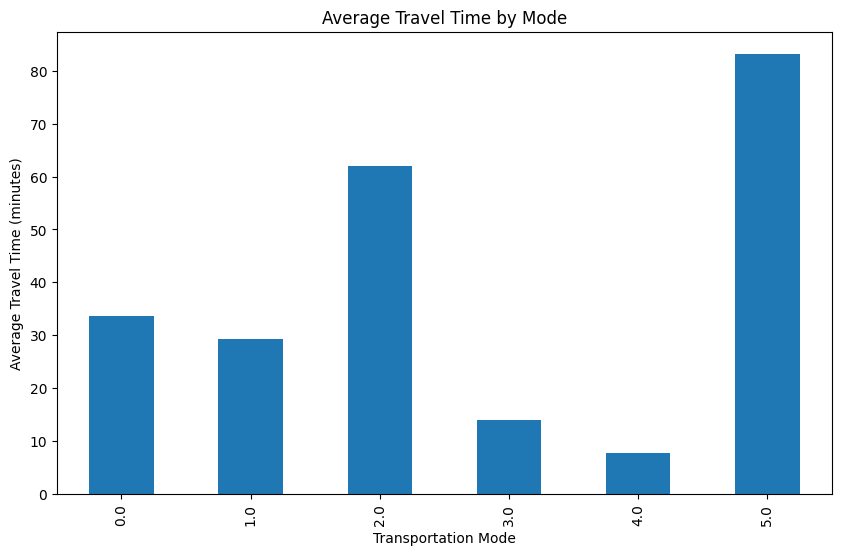

OD 매트릭스 (출발지-도착지 행정동간 통행수):
dest_hdong_cd    1111051500  1111053000  1111054000  1111055000  1111060000  \
origin_hdong_cd                                                               
1111051500              NaN         NaN         NaN         NaN         NaN   
1111053000              NaN         NaN         NaN         NaN         NaN   
1111056000              NaN         NaN         NaN         NaN         NaN   
1111058000              NaN         NaN         NaN         NaN         NaN   
1111061500              NaN         NaN         NaN         NaN         NaN   
...                     ...         ...         ...         ...         ...   
4161056000              NaN         NaN         NaN         NaN         NaN   
4161061000              NaN         NaN         NaN         NaN         NaN   
4163034000              NaN         NaN         NaN         NaN         NaN   
4183040000              NaN         NaN         NaN         NaN         NaN   
4413356600              

In [41]:

# 6. 유입동별 통행수 (origin 행정동별)
trips_by_origin_hdong = target.groupby('origin_hdong_cd')['od_cnts'].sum()

# 유입동별 통행수 출력 및 시각화
print("유입동별 통행수 (origin 행정동별):")
print(trips_by_origin_hdong)

# 유입동별 통행수 상위 10개만 시각화
plt.figure(figsize=(10,6))
trips_by_origin_hdong.nlargest(10).plot(kind='bar', title='Top 10 Origin Districts by Trips')
plt.ylabel('Number of Trips')
plt.xlabel('Origin Administrative District')
plt.show()

# 7. Destination 기준 시간별 유입량
time_based_dest_inflow = hoehyeon_inflow.groupby('start_time')['od_cnts'].sum()

# Destination 기준 시간별 유입량 출력 및 시각화
print("Destination 기준 시간별 유입량:")
print(time_based_dest_inflow)

# 시간대별 유입량 시각화
plt.figure(figsize=(10,6))
time_based_dest_inflow.plot(kind='line', title='Time-based Destination Inflow to Hoehyeon-dong')
plt.ylabel('Number of Trips')
plt.xlabel('Time of Day')
plt.xticks(rotation=45)
plt.show()

# 8. Destination 기준 travel time
travel_time_by_dest = target.groupby('dest_hdong_cd')['od_duration_avg'].mean()

# Destination 기준 travel time 출력
print("Destination 기준 travel time (평균 이동시간):")
print(travel_time_by_dest)

# 평균 이동시간 시각화 (상위 10개 목적지)
plt.figure(figsize=(10,6))
travel_time_by_dest.nlargest(10).plot(kind='bar', title='Top 10 Destinations by Average Travel Time')
plt.ylabel('Average Travel Time (minutes)')
plt.xlabel('Destination District')
plt.show()

# 9. 수단에 따른 travel time (수단별 평균 이동시간)
travel_time_by_mode = target.groupby('modal')['od_duration_avg'].mean()

# 수단별 평균 이동시간 출력 및 시각화
print("수단에 따른 평균 이동시간:")
print(travel_time_by_mode)

# 수단별 평균 이동시간 시각화
plt.figure(figsize=(10,6))
travel_time_by_mode.plot(kind='bar', title='Average Travel Time by Mode')
plt.ylabel('Average Travel Time (minutes)')
plt.xlabel('Transportation Mode')
plt.show()

# 10. OD 매트릭스 생성 (출발지-도착지 행정동간 통행수)
od_matrix = pd.pivot_table(target, values='od_cnts', index='origin_hdong_cd', columns='dest_hdong_cd', aggfunc='sum')

# OD 매트릭스 출력
print("OD 매트릭스 (출발지-도착지 행정동간 통행수):")
print(od_matrix)

In [52]:
dong_code.rename(columns={'dongcode':'dong_code'}, inplace=True)

In [53]:
dong_code

,행정동코드,시도명,시군구명,읍면동명,dong_code,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,1100000000,서울특별시,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,1111000000,종로구,19880423,NaN
2,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN
3,1111051500,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN
4,1111051500,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN
...,...,...,...,...,...,...,...,...
21772,5183035000,강원특별자치도,양양군,강현면,5183035038,장산리,20230611,NaN
21773,5183035000,강원특별자치도,양양군,강현면,5183035039,전진리,20230611,NaN
21774,5183035000,강원특별자치도,양양군,강현면,5183035040,주청리,20230611,NaN
21775,5183035000,강원특별자치도,양양군,강현면,5183035041,적은리,20230611,NaN


C:\Users\ansck\AppData\Local\Temp\ipykernel_10120\378964705.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['age_group'] = target['age'].map(age_map)
C:\Users\ansck\AppData\Local\Temp\ipykernel_10120\378964705.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['transport_mode'] = target['modal'].map(modal_map)
C:\Users\ansck\AppData\Local\Temp\ipykernel_10120\378964705.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

회현동 유동인구 총합: 69516
회현동 유입인구 수단 분담률:
transport_mode
기타      19.357233
도보       0.542093
시내버스     2.613662
지하철      6.382498
차량      70.743119
철도       0.361395
Name: od_cnts, dtype: float64


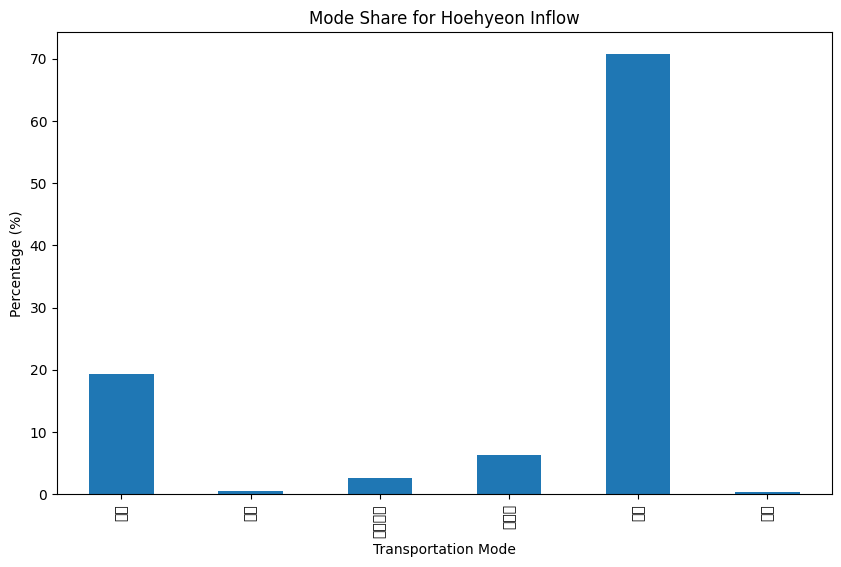

수단별 총 통행수:
transport_mode
기타      12507
도보        462
시내버스     1864
지하철      6955
차량      47301
철도        427
Name: od_cnts, dtype: int64


c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missin

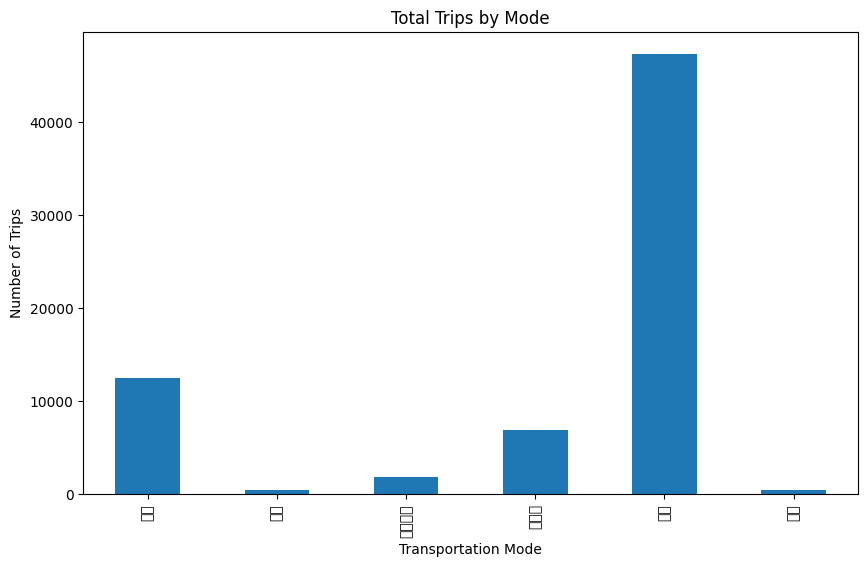

시간별 유동인구 (회현동 도착 기준):
start_time
08:00    2316
09:00    1893
10:00    1908
11:00    5538
12:00    6018
13:00    3173
14:00    2244
15:00    2205
16:00    1856
17:00    1314
18:00    1320
19:00     592
20:00     364
21:00     178
22:00      72
Name: od_cnts, dtype: int64


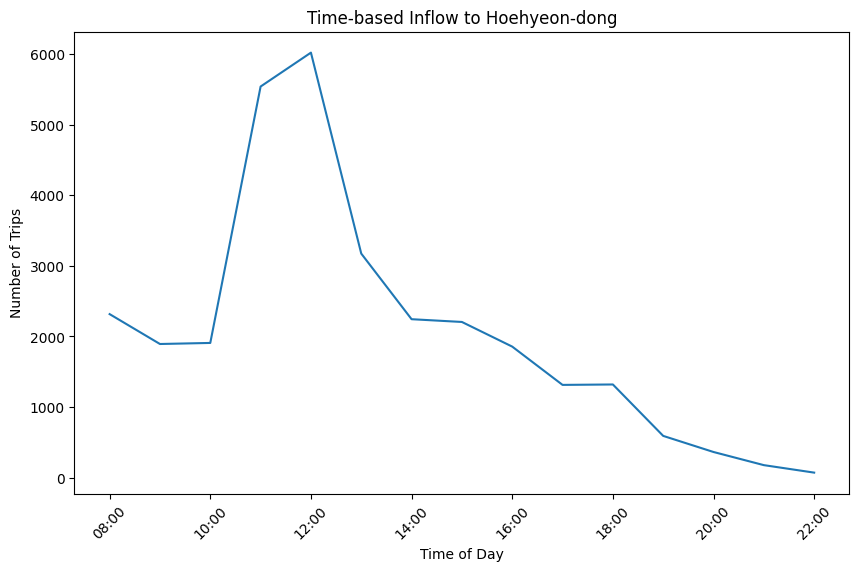

이용 그룹별 통행수 (age 그룹별):
age_group
10대        1555
20대        9779
30대       19052
40대       18351
50대       15221
60대        2485
70대         445
80세 이상       18
9세 이하      2610
Name: od_cnts, dtype: int64


c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) miss

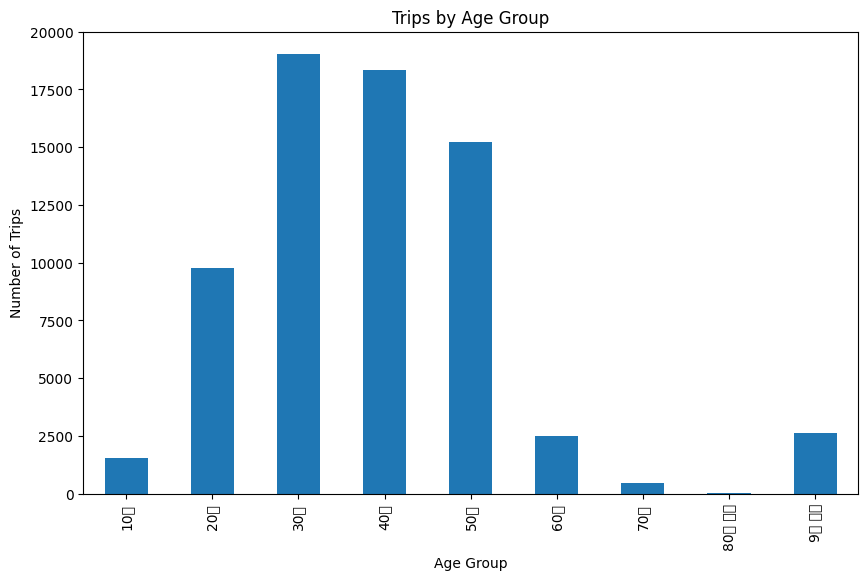

유입동별 통행수 (origin 행정동별):
origin_dong_name  origin_dong_ri
고촌읍               고촌읍                6
모현읍               모현읍                5
오남읍               오남읍                5
용문면               용문면               10
장흥면               장흥면                6
조치원읍              조치원읍              11
포곡읍               포곡읍                6
Name: od_cnts, dtype: int64


c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51021 (\N{HANGUL SYLLABLE EUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) m

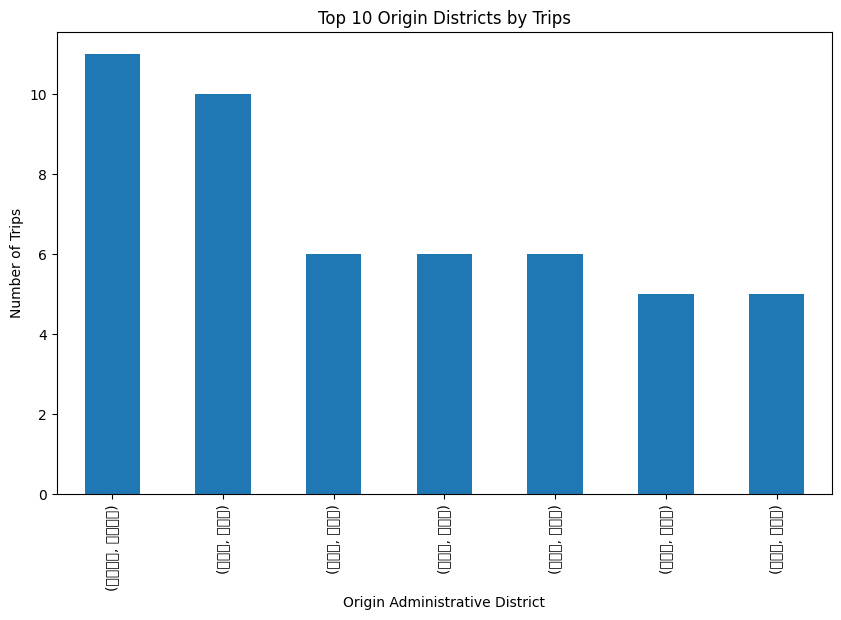

Destination 기준 시간별 유입량:
start_time
08:00    2316
09:00    1893
10:00    1908
11:00    5538
12:00    6018
13:00    3173
14:00    2244
15:00    2205
16:00    1856
17:00    1314
18:00    1320
19:00     592
20:00     364
21:00     178
22:00      72
Name: od_cnts, dtype: int64


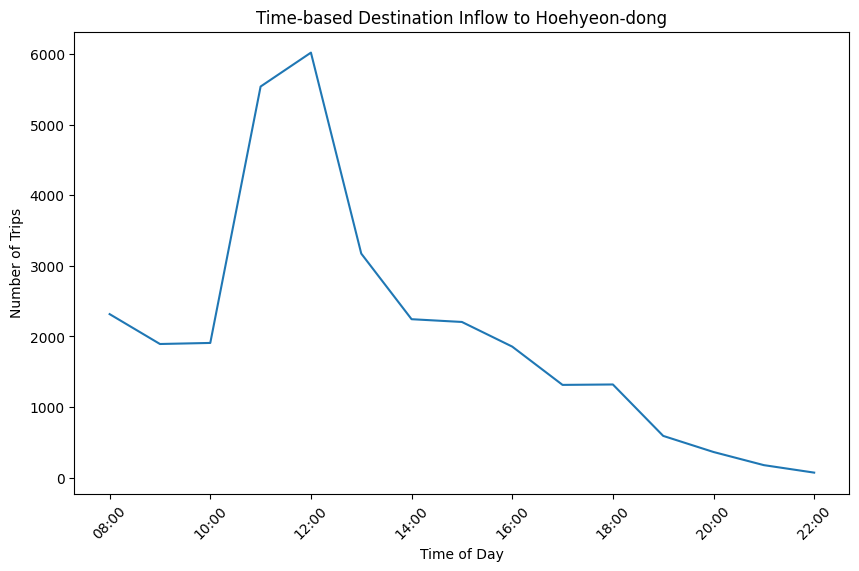

Destination 기준 travel time (평균 이동시간):
dest_dong_name
가산면      139.50
강화읍      150.00
공덕면      148.00
광혜원면     145.00
군남면      236.00
남면       167.00
남한산성면    152.00
대덕면      217.00
모현읍      131.00
미산면      167.00
백석읍      111.00
범서읍      254.00
법원읍      129.00
별내면       74.20
병천면      149.00
북면       215.00
소흘읍      106.00
송악면      173.00
신창면       79.00
안강읍      256.00
안면읍      208.75
양성면       94.00
오남읍       95.00
와부읍       96.75
우정읍      143.00
웅촌면      270.00
음봉면      195.00
인주면      298.00
정남면      149.00
진접읍       88.50
탄현면      119.00
탕정면       80.00
현도면      123.00
홍농읍      247.00
Name: od_duration_avg, dtype: float64


c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50885 (\N{HANGUL SYLLABLE UNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52492 (\N{HANGUL SYLLABLE CON}) m

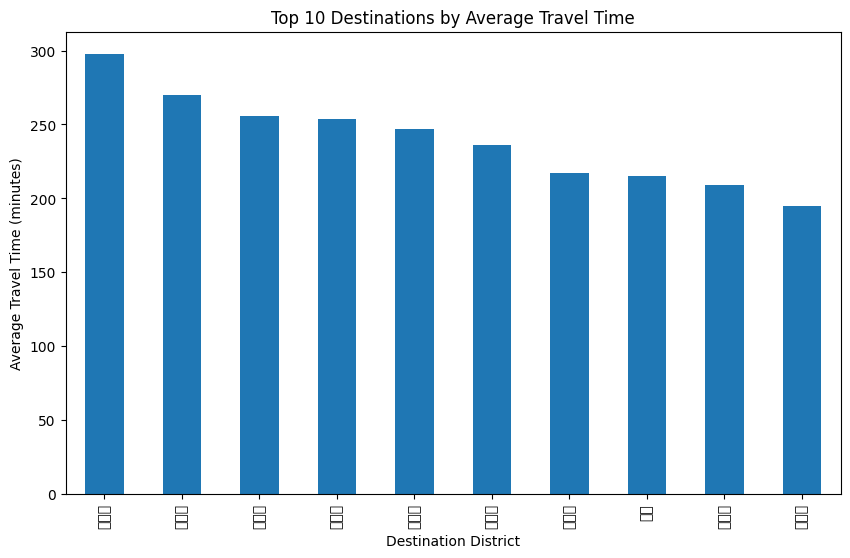

수단에 따른 평균 이동시간:
transport_mode
기타       7.651185
도보      14.033333
시내버스    29.367347
지하철     62.100469
차량      33.565862
철도      83.262295
Name: od_duration_avg, dtype: float64


c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missin

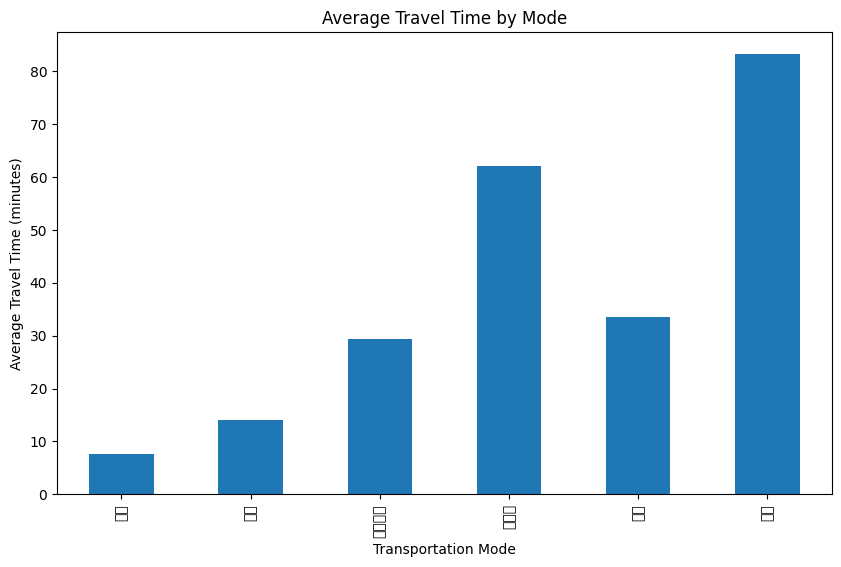

OD 매트릭스 (출발지-도착지 행정동간 통행수):
Empty DataFrame
Columns: []
Index: []


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# age, modal, purpose를 한국어로 매핑하기 위한 사전 정의
age_map = {
    0: '9세 이하', 
    1: '10대', 
    2: '20대', 
    3: '30대', 
    4: '40대', 
    5: '50대', 
    6: '60대', 
    7: '70대', 
    8: '80세 이상'
}

modal_map = {
    0: '차량', 
    1: '시내버스', 
    2: '지하철', 
    3: '도보', 
    4: '기타', 
    5: '철도', 
    6: '시외고속버스', 
    7: '항공기'
}

purpose_map = {
    0: '귀가', 
    1: '업무', 
    2: '학업', 
    3: '쇼핑여가', 
    4: '기타', 
    5: '여행'
}

# 매핑 적용
target['age_group'] = target['age'].map(age_map)
target['transport_mode'] = target['modal'].map(modal_map)
target['origin_purpose_kor'] = target['origin_purpose'].map(purpose_map)
target['dest_purpose_kor'] = target['dest_purpose'].map(purpose_map)

# 행정동 코드에 대응하는 읍면동 및 동리명을 추가


# 병합 작업
target = pd.merge(target, dong_code[['dong_code', '읍면동명', '동리명']], left_on='origin_hdong_cd', right_on='dong_code', how='left')
target.rename(columns={'읍면동명': 'origin_dong_name', '동리명': 'origin_dong_ri'}, inplace=True)

target = pd.merge(target, dong_code[['dong_code', '읍면동명', '동리명']], left_on='dest_hdong_cd', right_on='dong_code', how='left')
target.rename(columns={'읍면동명': 'dest_dong_name', '동리명': 'dest_dong_ri'}, inplace=True)

# 1. 회현동 유동인구 (origin 또는 dest가 회현동인 경우)
hoehyeon_cd = 1114054000
hoehyeon_flow = target[(target['origin_hdong_cd'] == hoehyeon_cd) | (target['dest_hdong_cd'] == hoehyeon_cd)]
total_flow_population = hoehyeon_flow['od_cnts'].sum()

# 회현동 유동인구 표 출력
print(f"회현동 유동인구 총합: {total_flow_population}")

# 2. 회현동 유입인구 수단 분담률 (회현동을 도착지로)
hoehyeon_inflow = target[target['dest_hdong_cd'] == hoehyeon_cd]
mode_share_inflow = hoehyeon_inflow.groupby('transport_mode')['od_cnts'].sum() / hoehyeon_inflow['od_cnts'].sum() * 100

# 회현동 유입인구 수단 분담률 출력 및 시각화
print("회현동 유입인구 수단 분담률:")
print(mode_share_inflow)

# 수단 분담률 시각화
plt.figure(figsize=(10,6))
mode_share_inflow.plot(kind='bar', title='Mode Share for Hoehyeon Inflow')
plt.ylabel('Percentage (%)')
plt.xlabel('Transportation Mode')
plt.show()

# 3. 수단별 총 통행수
total_trips_by_mode = target.groupby('transport_mode')['od_cnts'].sum()

# 수단별 총 통행수 출력 및 시각화
print("수단별 총 통행수:")
print(total_trips_by_mode)

# 수단별 총 통행수 시각화
plt.figure(figsize=(10,6))
total_trips_by_mode.plot(kind='bar', title='Total Trips by Mode')
plt.ylabel('Number of Trips')
plt.xlabel('Transportation Mode')
plt.show()

# 4. 시간별 유동인구 (회현동 도착 기준)
time_based_inflow = hoehyeon_inflow.groupby('start_time')['od_cnts'].sum()

# 시간별 유동인구 출력 및 시각화
print("시간별 유동인구 (회현동 도착 기준):")
print(time_based_inflow)

# 시간별 유동인구 시각화
plt.figure(figsize=(10,6))
time_based_inflow.plot(kind='line', title='Time-based Inflow to Hoehyeon-dong')
plt.ylabel('Number of Trips')
plt.xlabel('Time of Day')
plt.xticks(rotation=45)
plt.show()

# 5. 이용 그룹별 통행수 (age 그룹별)
trips_by_age_group = target.groupby('age_group')['od_cnts'].sum()

# 이용 그룹별 통행수 출력 및 시각화
print("이용 그룹별 통행수 (age 그룹별):")
print(trips_by_age_group)

# 이용 그룹별 통행수 시각화
plt.figure(figsize=(10,6))
trips_by_age_group.plot(kind='bar', title='Trips by Age Group')
plt.ylabel('Number of Trips')
plt.xlabel('Age Group')
plt.show()

# 6. 유입동별 통행수 (origin 행정동별)
trips_by_origin_hdong = target.groupby(['origin_dong_name', 'origin_dong_ri'])['od_cnts'].sum()

# 유입동별 통행수 출력 및 시각화
print("유입동별 통행수 (origin 행정동별):")
print(trips_by_origin_hdong)

# 유입동별 통행수 상위 10개만 시각화
plt.figure(figsize=(10,6))
trips_by_origin_hdong.nlargest(10).plot(kind='bar', title='Top 10 Origin Districts by Trips')
plt.ylabel('Number of Trips')
plt.xlabel('Origin Administrative District')
plt.show()

# 7. Destination 기준 시간별 유입량
time_based_dest_inflow = hoehyeon_inflow.groupby('start_time')['od_cnts'].sum()

# Destination 기준 시간별 유입량 출력 및 시각화
print("Destination 기준 시간별 유입량:")
print(time_based_dest_inflow)

# 시간대별 유입량 시각화
plt.figure(figsize=(10,6))
time_based_dest_inflow.plot(kind='line', title='Time-based Destination Inflow to Hoehyeon-dong')
plt.ylabel('Number of Trips')
plt.xlabel('Time of Day')
plt.xticks(rotation=45)
plt.show()

# 8. Destination 기준 travel time
travel_time_by_dest = target.groupby('dest_dong_name')['od_duration_avg'].mean()

# Destination 기준 travel time 출력
print("Destination 기준 travel time (평균 이동시간):")
print(travel_time_by_dest)

# 평균 이동시간 시각화 (상위 10개 목적지)
plt.figure(figsize=(10,6))
travel_time_by_dest.nlargest(10).plot(kind='bar', title='Top 10 Destinations by Average Travel Time')
plt.ylabel('Average Travel Time (minutes)')
plt.xlabel('Destination District')
plt.show()

# 9. 수단에 따른 travel time (수단별 평균 이동시간)
travel_time_by_mode = target.groupby('transport_mode')['od_duration_avg'].mean()

# 수단별 평균 이동시간 출력 및 시각화
print("수단에 따른 평균 이동시간:")
print(travel_time_by_mode)

# 수단별 평균 이동시간 시각화
plt.figure(figsize=(10,6))
travel_time_by_mode.plot(kind='bar', title='Average Travel Time by Mode')
plt.ylabel('Average Travel Time (minutes)')
plt.xlabel('Transportation Mode')
plt.show()

# 10. OD 매트릭스 생성 (출발지-도착지 행정동간 통행수)
od_matrix = pd.pivot_table(target, values='od_cnts', index='origin_dong_name', columns='dest_dong_name', aggfunc='sum')

# OD 매트릭스 출력
print("OD 매트릭스 (출발지-도착지 행정동간 통행수):")
print(od_matrix)


In [73]:
# Group by destination name and sum the population flow (od_cnts)
pop_flow_by_dest = seoul_data_with_names.groupby('dong_name_dest')['od_cnts'].sum().sort_values(ascending=False)

# Print the top 10 destination names with the highest population flow
print(pop_flow_by_dest)


dong_name_dest
명동             18671630
종로1.2.3.4가동    13070068
소공동             4055976
필동              3999512
회현동             3302870
사직동             2663172
청운효자동           2071470
을지로동            1433210
삼청동             1232105
광희동              957720
Name: od_cnts, dtype: int64



Gender-based Mode Share (표):
transport_mode    기타   도보  시내버스   지하철     차량   철도
gender                                           
0               7040  255   861  3172  27059  164
1               5467  207  1003  3783  20242  263


c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missin

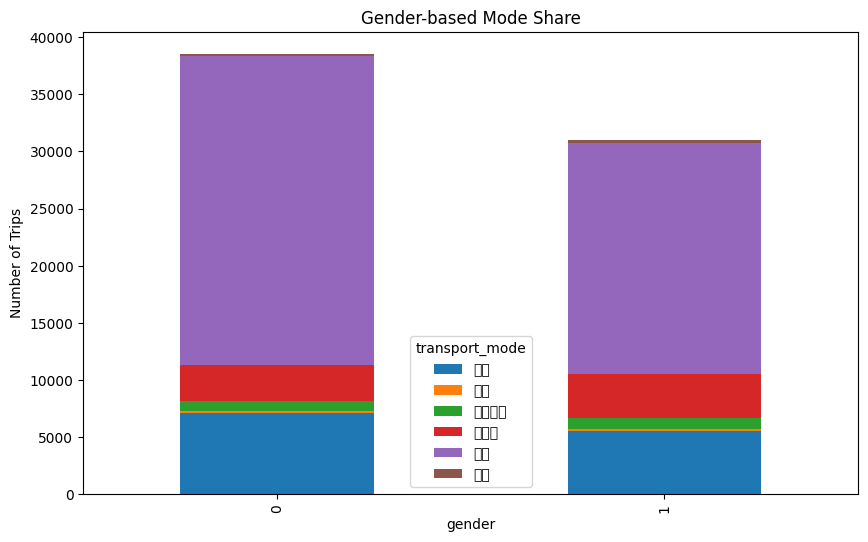

C:\Users\ansck\AppData\Local\Temp\ipykernel_10120\1360771757.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist_mode_share = target.groupby(['dist_group', 'transport_mode'])['od_cnts'].sum().unstack().fillna(0)



Distance-based Mode Share (표):
transport_mode    기타   도보  시내버스   지하철     차량   철도
dist_group                                       
1km 미만          5605  108     0     0      0    0
1~5km           6176  290     5    18   9413    0
5km 이상           726   64  1859  6937  37888  427


c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) miss

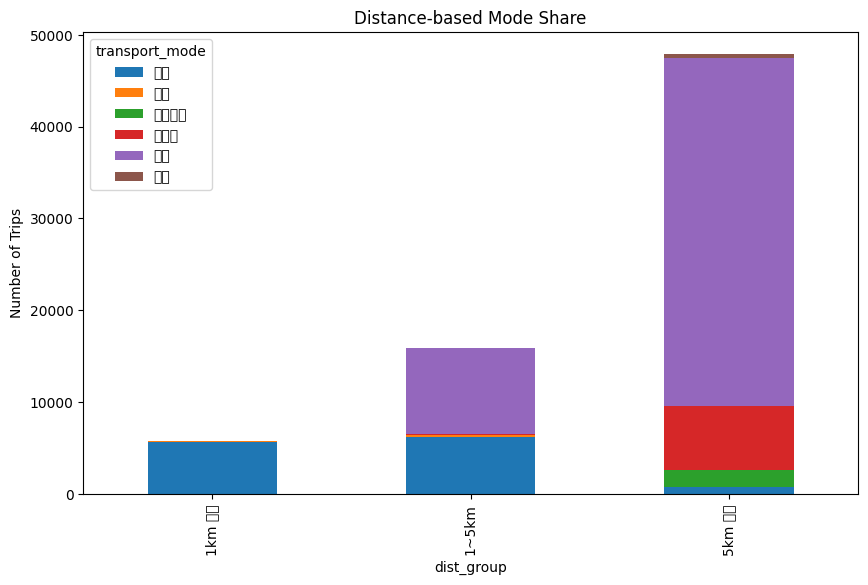


Age Group-based Purpose Share (표):
origin_purpose_kor      귀가      기타    쇼핑여가       업무     여행     학업
age_group                                                        
10대                  462.0   257.0   281.0      0.0  306.0  249.0
20대                  715.0  1717.0   998.0   5715.0  333.0  301.0
30대                 1238.0  1668.0  1114.0  14597.0  435.0    0.0
40대                  514.0  1171.0  1283.0  15150.0  233.0    0.0
50대                 1324.0  1021.0  1423.0  11298.0  155.0    0.0
60대                  184.0    68.0   510.0   1723.0    0.0    0.0
70대                   64.0     8.0   233.0    140.0    0.0    0.0
80세 이상                 5.0     0.0    13.0      0.0    0.0    0.0
9세 이하                935.0   157.0   578.0      0.0  616.0  324.0


c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) miss

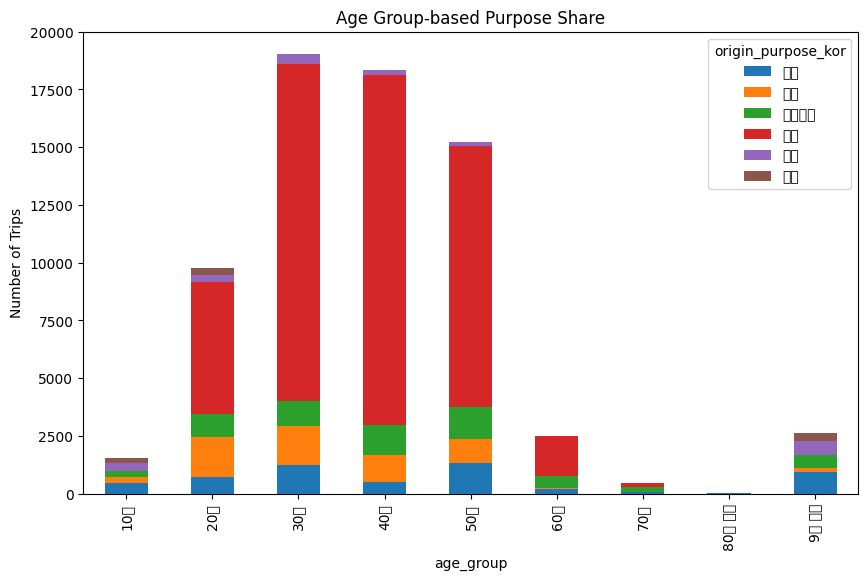

C:\Users\ansck\AppData\Local\Temp\ipykernel_10120\1360771757.py:82: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  target['time_group'] = pd.cut(pd.to_datetime(target['start_time']).dt.hour, bins=[0, 8, 10, 17, 19, 24],
C:\Users\ansck\AppData\Local\Temp\ipykernel_10120\1360771757.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_congestion = target.groupby(['time_group'])['od_cnts'].sum()
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages


Time-based Congestion (표):
time_group
비출근시간        0
출근시간      6269
비혼잡시간    48237
퇴근시간     10923
밤시간대      4087
Name: od_cnts, dtype: int64


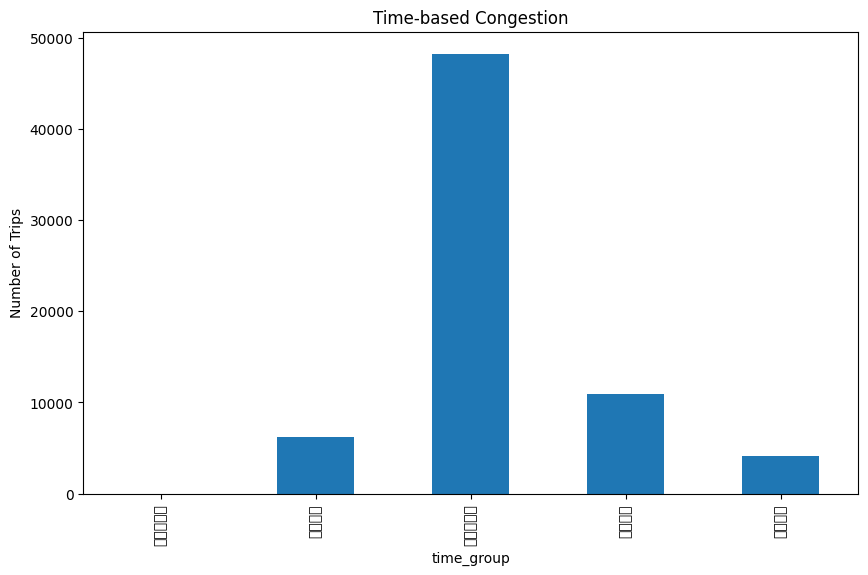


Average Travel Duration by Purpose (표):
origin_purpose_kor
귀가      40.653491
기타      34.280813
쇼핑여가    37.656627
업무      30.054400
여행      64.148148
학업      36.505263
Name: od_duration_avg, dtype: float64


c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49660 (\N{HANGUL SYLLABLE SYO}) miss

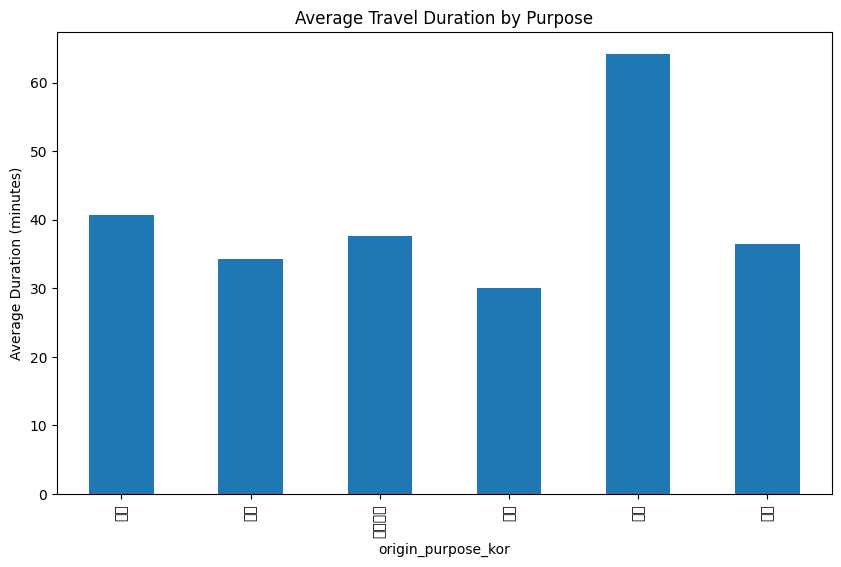


Average Travel Distance by Mode (표):
transport_mode
기타        2249.849289
도보        3466.433333
시내버스     21312.330612
지하철      56413.975587
차량       28838.320261
철도      113617.524590
Name: od_dist_avg, dtype: float64


c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missin

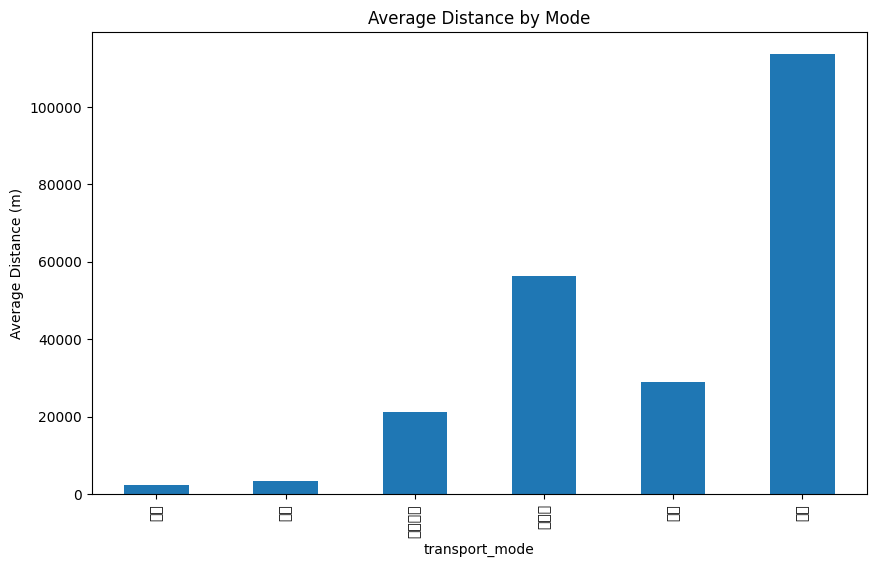


Top 10 Origin-Destination Flows by Number of Trips (표):
Empty DataFrame
Columns: [origin_dong_name, dest_dong_name, od_cnts]
Index: []

Travel Duration by Mode and Time Group (표):
transport_mode        기타         도보       시내버스        지하철         차량  \
time_group                                                             
비출근시간           0.000000   0.000000   0.000000   0.000000   0.000000   
출근시간            5.759036  26.166667  30.250000  48.443983  30.632754   
비혼잡시간           7.919949  13.090909  25.345912  72.071066  28.732728   
퇴근시간            6.205128  11.142857  37.958333  63.793456  51.297842   
밤시간대            9.338235  10.333333  41.000000  65.717391  36.737752   

transport_mode          철도  
time_group                  
비출근시간             0.000000  
출근시간             76.285714  
비혼잡시간           111.363636  
퇴근시간             76.750000  
밤시간대             79.571429  


C:\Users\ansck\AppData\Local\Temp\ipykernel_10120\1360771757.py:127: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_mode_duration = target.groupby(['time_group', 'transport_mode'])['od_duration_avg'].mean().unstack().fillna(0)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing 

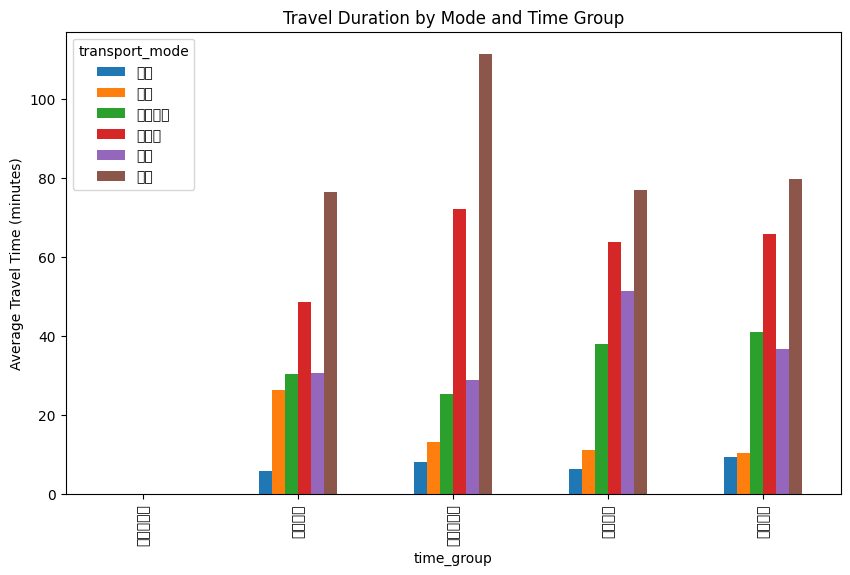


Top 10 Origins by Number of Trips (표):
origin_dong_name
조치원읍    11
용문면     10
고촌읍      6
장흥면      6
포곡읍      6
모현읍      5
오남읍      5
Name: od_cnts, dtype: int64


c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51021 (\N{HANGUL SYLLABLE EUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) m

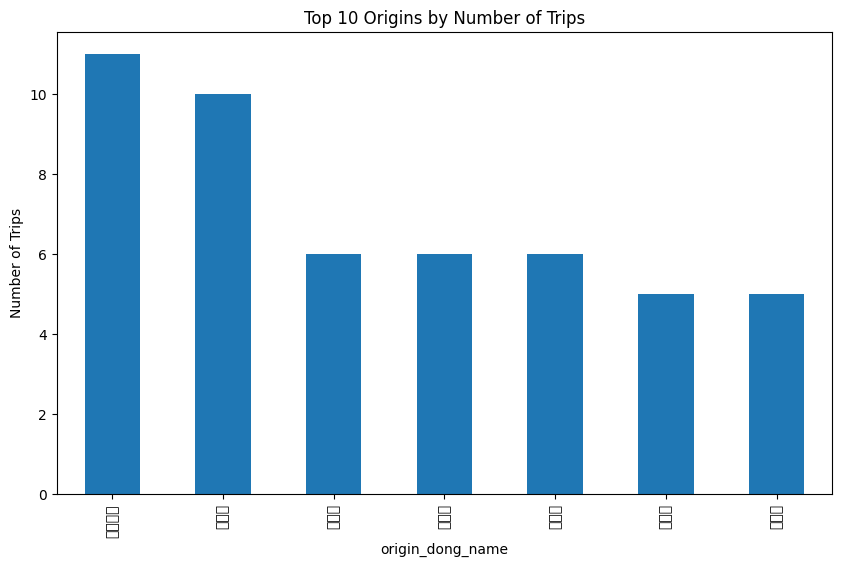


Top 10 Destinations by Number of Trips (표):
dest_dong_name
와부읍    45
별내면    28
안면읍    27
대덕면    20
현도면    19
오남읍    16
진접읍    16
가산면    15
남면     15
공덕면    10
Name: od_cnts, dtype: int64


c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51021 (\N{HANGUL SYLLABLE EUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) m

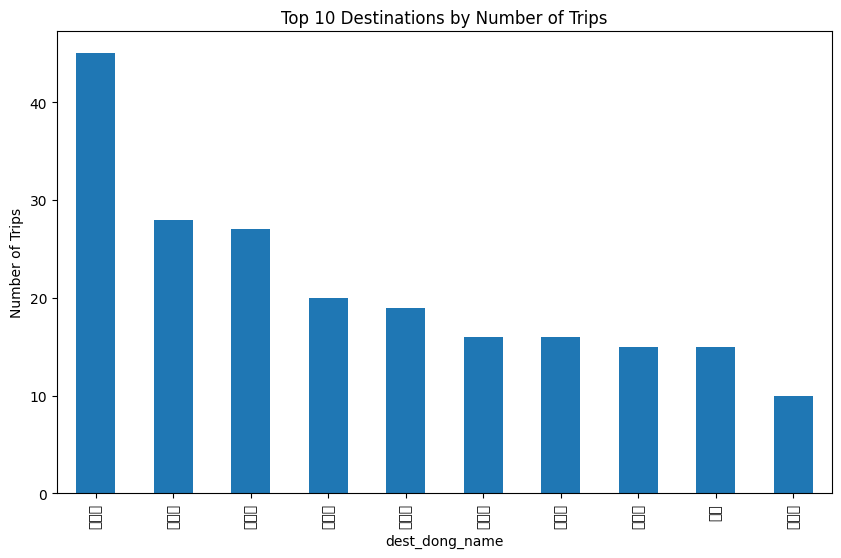


Top 10 Routes by Number of Trips (표):
Empty DataFrame
Columns: [od_cnts, od_duration_avg, od_dist_avg]
Index: []

기초 통계량 (표):
       origin_hdong_cd  dest_hdong_cd        date       gender          age  \
count     6.464000e+03   6.464000e+03      6464.0  6464.000000  6464.000000   
mean      1.149741e+09   1.343489e+09  20230901.0     0.490408     3.578744   
std       3.103738e+08   7.685906e+08         0.0     0.499947     1.348113   
min       1.111052e+09   1.111052e+09  20230901.0     0.000000     0.000000   
25%       1.114054e+09   1.114054e+09  20230901.0     0.000000     3.000000   
50%       1.114054e+09   1.114055e+09  20230901.0     0.000000     4.000000   
75%       1.114055e+09   1.117053e+09  20230901.0     1.000000     5.000000   
max       4.413357e+09   5.175033e+09  20230901.0     1.000000     8.000000   

             modal  origin_purpose  dest_purpose    od_dist_avg  \
count  6464.000000     6464.000000   6464.000000    6464.000000   
mean      1.095297        1

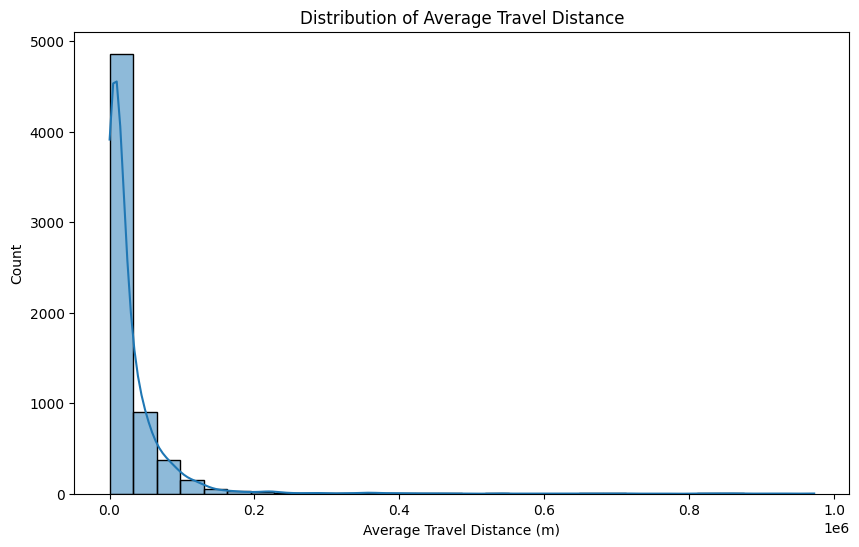

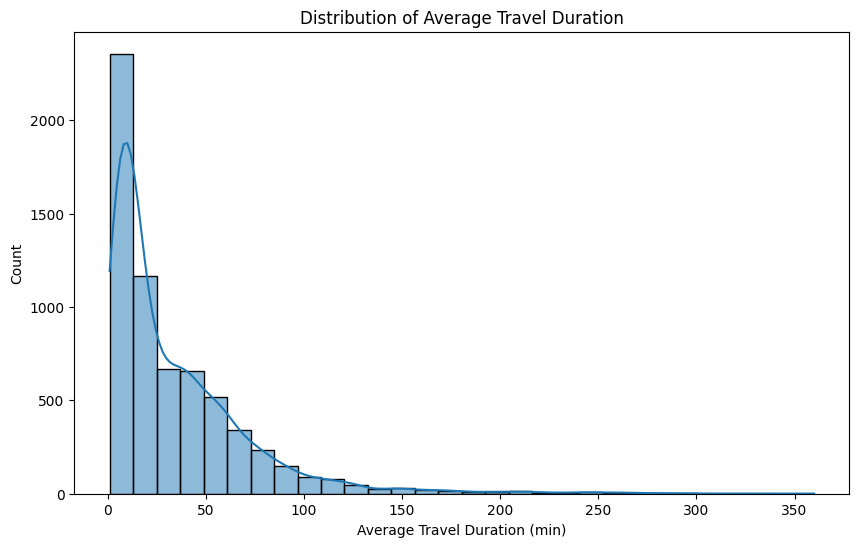

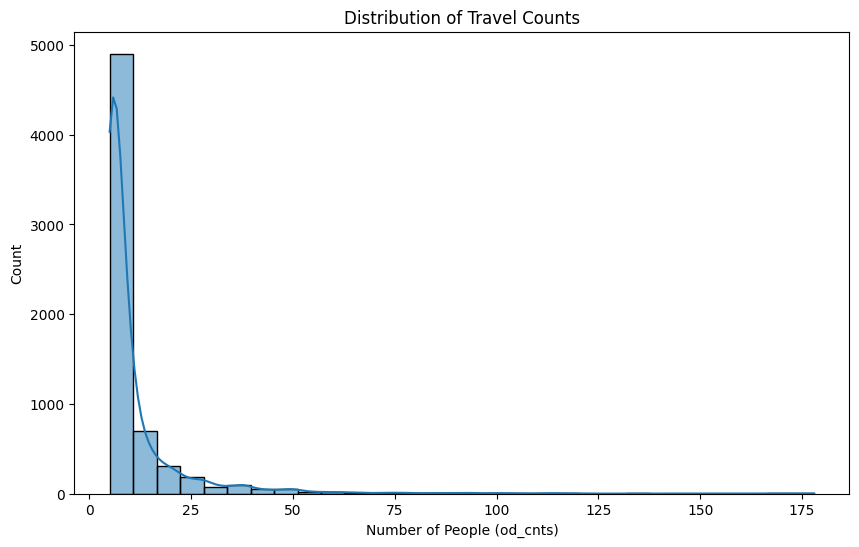

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 기본적인 age, modal, purpose 매핑
age_map = {
    0: '9세 이하', 
    1: '10대', 
    2: '20대', 
    3: '30대', 
    4: '40대', 
    5: '50대', 
    6: '60대', 
    7: '70대', 
    8: '80세 이상'
}

modal_map = {
    0: '차량', 
    1: '시내버스', 
    2: '지하철', 
    3: '도보', 
    4: '기타', 
    5: '철도', 
    6: '시외고속버스', 
    7: '항공기'
}

purpose_map = {
    0: '귀가', 
    1: '업무', 
    2: '학업', 
    3: '쇼핑여가', 
    4: '기타', 
    5: '여행'
}

# 매핑 적용
target['age_group'] = target['age'].map(age_map)
target['transport_mode'] = target['modal'].map(modal_map)
target['origin_purpose_kor'] = target['origin_purpose'].map(purpose_map)
target['dest_purpose_kor'] = target['dest_purpose'].map(purpose_map)

# 1. 성별에 따른 이동 패턴 분석
gender_mode_share = target.groupby(['gender', 'transport_mode'])['od_cnts'].sum().unstack().fillna(0)
print("\nGender-based Mode Share (표):")
print(gender_mode_share)

# 성별에 따른 이동 수단 분담률 시각화
gender_mode_share.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Gender-based Mode Share')
plt.ylabel('Number of Trips')
plt.show()

# 2. 이동 거리별 통행 패턴 분석
bins = [0, 1000, 5000, float('inf')]
labels = ['1km 미만', '1~5km', '5km 이상']
target['dist_group'] = pd.cut(target['od_dist_avg'], bins=bins, labels=labels)

dist_mode_share = target.groupby(['dist_group', 'transport_mode'])['od_cnts'].sum().unstack().fillna(0)
print("\nDistance-based Mode Share (표):")
print(dist_mode_share)

# 이동 거리별 통행 패턴 시각화
dist_mode_share.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Distance-based Mode Share')
plt.ylabel('Number of Trips')
plt.show()

# 3. 연령대별 이동 목적 분석
age_purpose_share = target.groupby(['age_group', 'origin_purpose_kor'])['od_cnts'].sum().unstack().fillna(0)
print("\nAge Group-based Purpose Share (표):")
print(age_purpose_share)

# 연령대별 이동 목적 시각화
age_purpose_share.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Age Group-based Purpose Share')
plt.ylabel('Number of Trips')
plt.show()

# 4. 시간대별 교통 혼잡도 분석
target['time_group'] = pd.cut(pd.to_datetime(target['start_time']).dt.hour, bins=[0, 8, 10, 17, 19, 24], 
                               labels=['비출근시간', '출근시간', '비혼잡시간', '퇴근시간', '밤시간대'], right=False)

time_congestion = target.groupby(['time_group'])['od_cnts'].sum()
print("\nTime-based Congestion (표):")
print(time_congestion)

# 시간대별 교통 혼잡도 시각화
time_congestion.plot(kind='bar', figsize=(10,6))
plt.title('Time-based Congestion')
plt.ylabel('Number of Trips')
plt.show()

# 5. 이동 목적에 따른 평균 이동 시간 분석
purpose_duration = target.groupby(['origin_purpose_kor'])['od_duration_avg'].mean()
print("\nAverage Travel Duration by Purpose (표):")
print(purpose_duration)

# 이동 목적에 따른 평균 이동 시간 시각화
purpose_duration.plot(kind='bar', figsize=(10,6))
plt.title('Average Travel Duration by Purpose')
plt.ylabel('Average Duration (minutes)')
plt.show()

# 6. 이동 수단별 이동 거리 분석
mode_distance = target.groupby(['transport_mode'])['od_dist_avg'].mean()
print("\nAverage Travel Distance by Mode (표):")
print(mode_distance)

# 이동 수단별 이동 거리 시각화
mode_distance.plot(kind='bar', figsize=(10,6))
plt.title('Average Distance by Mode')
plt.ylabel('Average Distance (m)')
plt.show()

# 7. 출발지/도착지 기준 주요 이동 패턴 분석
origin_dest_flow = target.groupby(['origin_dong_name', 'dest_dong_name'])['od_cnts'].sum().reset_index()

top_10_flows = origin_dest_flow.nlargest(10, 'od_cnts')
print("\nTop 10 Origin-Destination Flows by Number of Trips (표):")
print(top_10_flows)



# 8. 교통 수단 및 시간대별 이동 시간 비교
time_mode_duration = target.groupby(['time_group', 'transport_mode'])['od_duration_avg'].mean().unstack().fillna(0)
print("\nTravel Duration by Mode and Time Group (표):")
print(time_mode_duration)

# 교통 수단 및 시간대별 이동 시간 비교 시각화
time_mode_duration.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Travel Duration by Mode and Time Group')
plt.ylabel('Average Travel Time (minutes)')
plt.show()

# 9. 이동 빈도 상위 10개 지역 분석
top_10_origins = target.groupby(['origin_dong_name'])['od_cnts'].sum().nlargest(10)
print("\nTop 10 Origins by Number of Trips (표):")
print(top_10_origins)

top_10_origins.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Origins by Number of Trips')
plt.ylabel('Number of Trips')
plt.show()

top_10_dests = target.groupby(['dest_dong_name'])['od_cnts'].sum().nlargest(10)
print("\nTop 10 Destinations by Number of Trips (표):")
print(top_10_dests)

top_10_dests.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Destinations by Number of Trips')
plt.ylabel('Number of Trips')
plt.show()

# 10. 이동 횟수 상위 10개 경로의 평균 이동 시간 및 거리 분석
top_10_routes = target.groupby(['origin_dong_name', 'dest_dong_name']).agg({'od_cnts': 'sum', 'od_duration_avg': 'mean', 'od_dist_avg': 'mean'}).nlargest(10, 'od_cnts')
print("\nTop 10 Routes by Number of Trips (표):")
print(top_10_routes)

# 기초 통계량 도출
print("\n기초 통계량 (표):")
print(target.describe())

# 수치형 열들의 분포 시각화
plt.figure(figsize=(10,6))
sns.histplot(target['od_dist_avg'], bins=30, kde=True)
plt.title('Distribution of Average Travel Distance')
plt.xlabel('Average Travel Distance (m)')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(target['od_duration_avg'], bins=30, kde=True)
plt.title('Distribution of Average Travel Duration')
plt.xlabel('Average Travel Duration (min)')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(target['od_cnts'], bins=30, kde=True)
plt.title('Distribution of Travel Counts')
plt.xlabel('Number of People (od_cnts)')
plt.show()


Hourly Flow Data for Each Dong:
   end_hour  origin_hdong_cd dong_name_origin  dest_hdong_cd dong_name_dest  \
0         8       1111051500            청운효자동     1111053000            사직동   
1         8       1111051500            청운효자동     1111054000            삼청동   
2         8       1111051500            청운효자동     1111055000            부암동   
3         8       1111051500            청운효자동     1111061500    종로1.2.3.4가동   
4         8       1111051500            청운효자동     1114055000             명동   
5         8       1111051500            청운효자동     1129064000          정릉제3동   
6         8       1111053000              사직동     1111051500          청운효자동   
7         8       1111053000              사직동     1111054000            삼청동   
8         8       1111053000              사직동     1111058000            교남동   
9         8       1111053000              사직동     1111061500    종로1.2.3.4가동   

   od_cnts  
0     8400  
1     1960  
2     1680  
3     1740  
4     4140  
5       50  
6    21

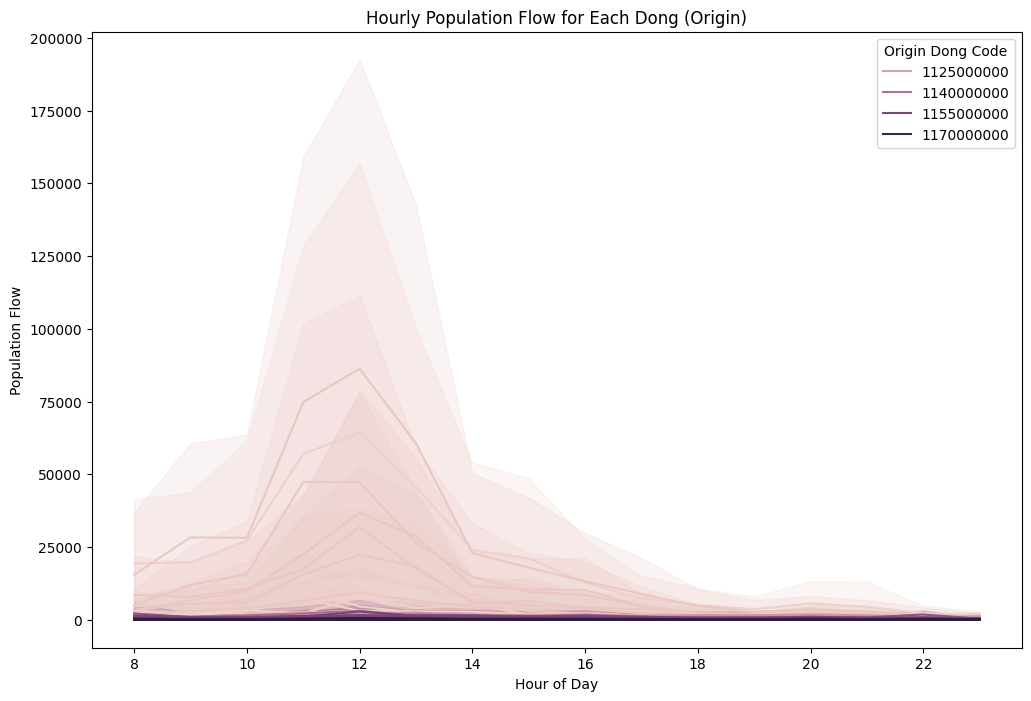

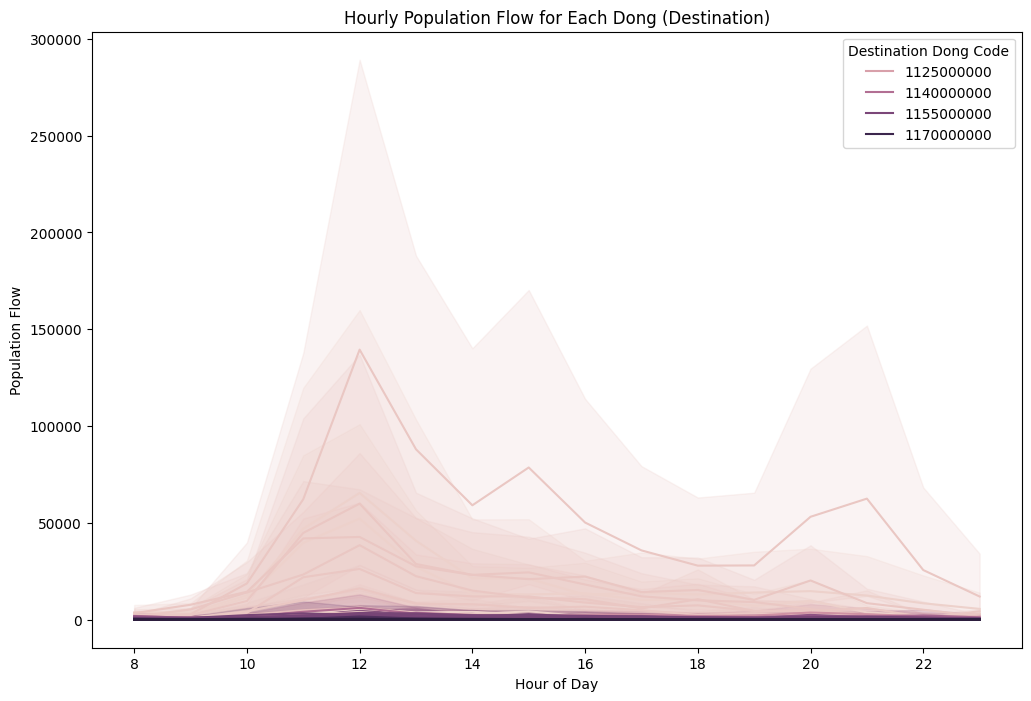


Top 50 Hourly Flows for Each Dong:
        end_hour  origin_hdong_cd dong_name_origin  dest_hdong_cd  \
33405         12       1111061500      종로1.2.3.4가동     1114055000   
33600         12       1114055000               명동     1111061500   
40179         13       1114055000               명동     1111061500   
27221         11       1114055000               명동     1111061500   
27060         11       1111061500      종로1.2.3.4가동     1114055000   
39965         13       1111061500      종로1.2.3.4가동     1114055000   
46994         14       1111061500      종로1.2.3.4가동     1114055000   
33549         12       1114052000              소공동     1114055000   
82570         18       1111061500      종로1.2.3.4가동     1114055000   
47253         14       1114055000               명동     1111061500   
54387         15       1111061500      종로1.2.3.4가동     1114055000   
33639         12       1114057000               필동     1114055000   
62883         16       1111061500      종로1.2.3.4가동     1114055000  

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by end_hour, origin_hdong_cd, and dest_hdong_cd and calculate the sum of od_cnts
hourly_flow_analysis = seoul_data_with_names.groupby(['end_hour', 'origin_hdong_cd', 'dong_name_origin', 
                                                      'dest_hdong_cd', 'dong_name_dest'])['od_cnts'].sum().reset_index()

# Display top rows of hourly flow data
print("Hourly Flow Data for Each Dong:")
print(hourly_flow_analysis.head(10))

# Plot hourly flow for each dong
plt.figure(figsize=(12, 8))
sns.lineplot(x='end_hour', y='od_cnts', hue='origin_hdong_cd', data=hourly_flow_analysis)
plt.title('Hourly Population Flow for Each Dong (Origin)')
plt.xlabel('Hour of Day')
plt.ylabel('Population Flow')
plt.legend(title='Origin Dong Code', loc='upper right')
plt.show()

# Plot hourly flow for destination dongs
plt.figure(figsize=(12, 8))
sns.lineplot(x='end_hour', y='od_cnts', hue='dest_hdong_cd', data=hourly_flow_analysis)
plt.title('Hourly Population Flow for Each Dong (Destination)')
plt.xlabel('Hour of Day')
plt.ylabel('Population Flow')
plt.legend(title='Destination Dong Code', loc='upper right')
plt.show()

# Show the top hourly flows for each dong in the console for analysis
top_hourly_flow = hourly_flow_analysis.sort_values(by='od_cnts', ascending=False).head(50)
print("\nTop 50 Hourly Flows for Each Dong:")
print(top_hourly_flow[['end_hour', 'origin_hdong_cd', 'dong_name_origin', 'dest_hdong_cd', 'dong_name_dest', 'od_cnts']])


In [79]:
# Group the data by origin, destination, and hour
hourly_od_data = seoul_data_with_names.groupby(['origin_hdong_cd', 'dest_hdong_cd', 'end_hour'])['od_cnts'].sum().reset_index()

# Rename the columns for clarity
hourly_od_data.columns = ['origin_dong', 'dest_dong', 'hour', 'population_flow']


In [82]:
import geopandas as gpd

# Load the GeoJSON fi

Top 20 Origin-Destination Pairs by Movement Counts (with Korean names):
     dong_name_origin dong_name_dest  od_cnts
724       종로1.2.3.4가동             명동  9450056
2431               명동    종로1.2.3.4가동  8883773
1823              소공동             명동  3343740
2816               필동             명동  2436643
2439               명동            소공동  2240844
2441               명동             필동  2189715
2440               명동            회현동  1723390
2143              회현동             명동  1459810
1822              소공동            회현동  1124640
708       종로1.2.3.4가동            사직동  1118472
3361             을지로동    종로1.2.3.4가동   990350
3369             을지로동             명동   968070
107               사직동    종로1.2.3.4가동   901320
100               사직동          청운효자동   855360
709       종로1.2.3.4가동            삼청동   816872
713       종로1.2.3.4가동            가회동   733700
2142              회현동            소공동   730440
1807              소공동            사직동   711072
728       종로1.2.3.4가동           을지로동   633360
707     

c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ansck\anaconda3\envs\bitcoin\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}

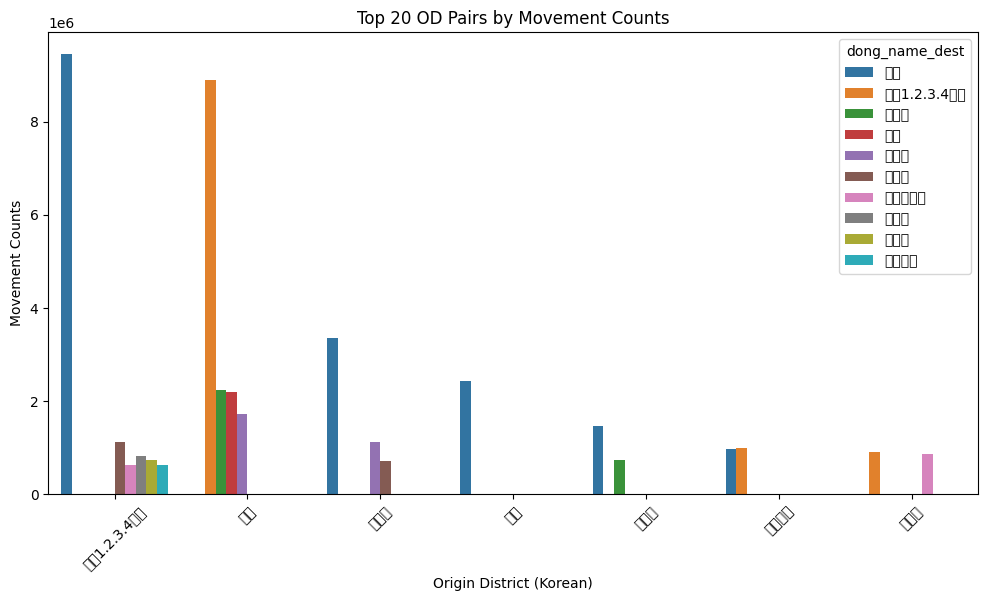

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group by origin and destination district codes, summing the 'od_cnts'
od_matrix_full = seoul_data_with_names.groupby(['origin_hdong_cd', 'dest_hdong_cd', 'dong_name_origin', 'dong_name_dest'])['od_cnts'].sum().reset_index()

# Step 2: Sort by 'od_cnts' and extract top 20 OD pairs
top_20_od = od_matrix_full.sort_values(by='od_cnts', ascending=False).head(20)

# Display the top 20 OD pairs with their movement counts and Korean names
print("Top 20 Origin-Destination Pairs by Movement Counts (with Korean names):")
print(top_20_od[['dong_name_origin', 'dong_name_dest', 'od_cnts']])

# Step 3: Visualize the top 20 OD pairs
plt.figure(figsize=(12, 6))
sns.barplot(x='dong_name_origin', y='od_cnts', hue='dong_name_dest', data=top_20_od)
plt.title('Top 20 OD Pairs by Movement Counts')
plt.xlabel('Origin District (Korean)')
plt.ylabel('Movement Counts')
plt.xticks(rotation=45)
plt.show()


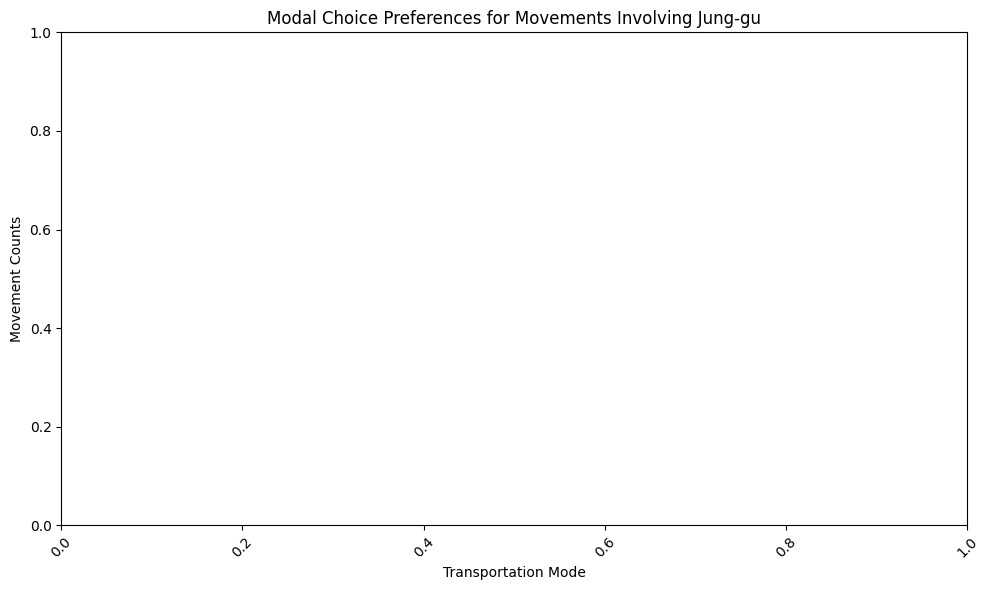

C:\Users\ansck\AppData\Local\Temp\ipykernel_18652\3499602888.py:47: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ansck\AppData\Local\Temp\ipykernel_18652\3499602888.py:47: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ansck\AppData\Local\Temp\ipykernel_18652\3499602888.py:47: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ansck\AppData\Local\Temp\ipykernel_18652\3499602888.py:47: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ansck\AppData\Local\Temp\ipykernel_18652\3499602888.py:47: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ansck\AppData\Local\Temp\ipykernel_18652\3499602888.py:47: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing 

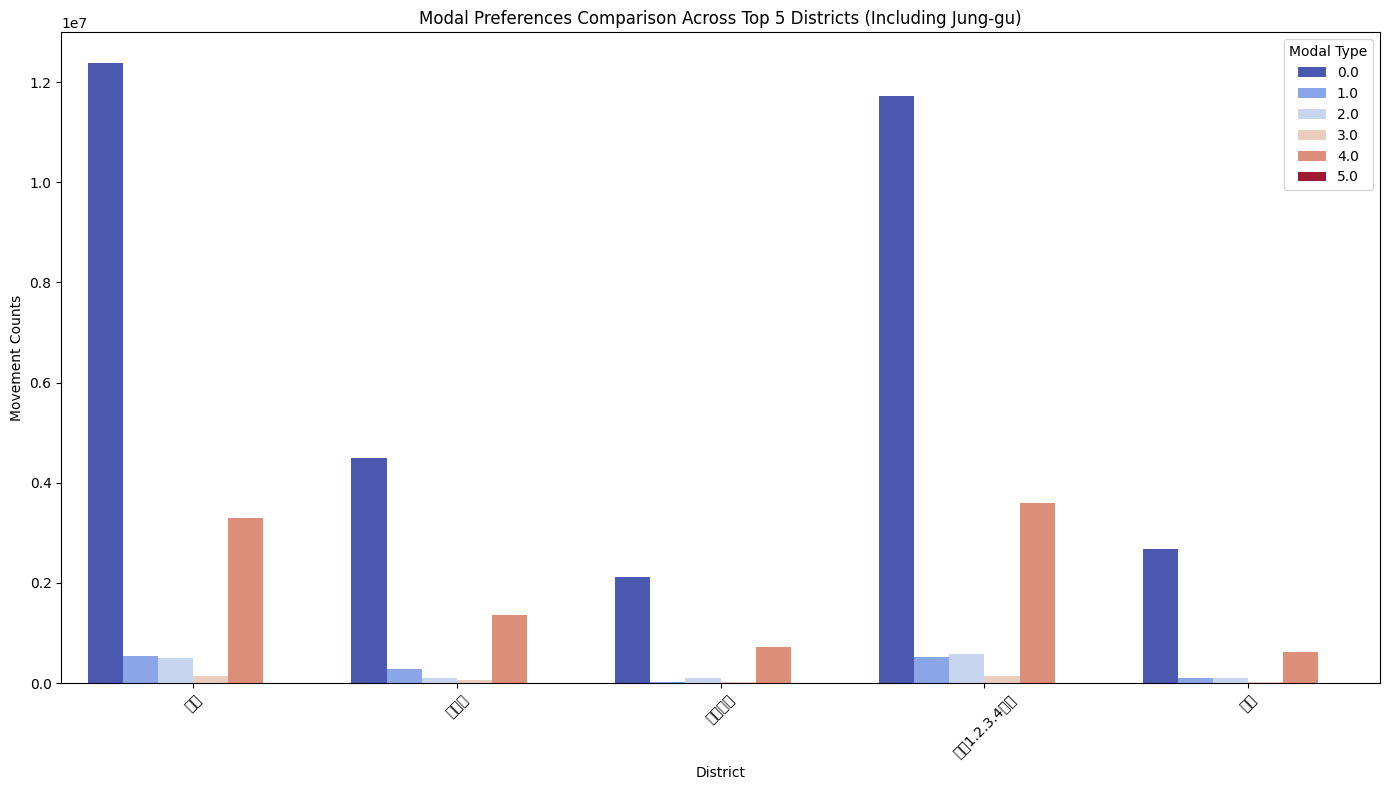

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter for Jung-gu in origin or destination
jung_gu_data = seoul_data_with_names[(seoul_data_with_names['dong_name_origin'] == '중구') | 
                                     (seoul_data_with_names['dong_name_dest'] == '중구')]

# Step 2: Group by modal type and sum the 'od_cnts' for movements involving Jung-gu
jung_gu_modal_preferences = jung_gu_data.groupby('modal')['od_cnts'].sum().reset_index()

# Step 3: Create a bar plot for modal choice preferences within Jung-gu
plt.figure(figsize=(10, 6))
sns.barplot(x='modal', y='od_cnts', data=jung_gu_modal_preferences, palette='coolwarm')

# Map modal codes to actual modes (e.g., 1=Walking, 2=Bus, etc.)
modal_labels = {0: 'Unknown', 1: 'Walking', 2: 'Bus', 3: 'Car', 4: 'Subway'}
jung_gu_modal_preferences['modal_label'] = jung_gu_modal_preferences['modal'].map(modal_labels)

# Step 4: Plot with meaningful labels
sns.barplot(x='modal_label', y='od_cnts', data=jung_gu_modal_preferences, palette='coolwarm')

plt.title('Modal Choice Preferences for Movements Involving Jung-gu')
plt.xlabel('Transportation Mode')
plt.ylabel('Movement Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Compare modal preferences across other districts as well
# Group by district and modal to analyze preferences for Jung-gu compared to other districts
modal_across_districts = seoul_data_with_names.groupby(['dong_name_origin', 'modal'])['od_cnts'].sum().reset_index()

# Filter the top 5 districts (including Jung-gu) for comparison
top_districts = modal_across_districts.groupby('dong_name_origin')['od_cnts'].sum().nlargest(5).index
filtered_districts = modal_across_districts[modal_across_districts['dong_name_origin'].isin(top_districts)]

# Step 6: Plot a comparison of modal preferences across top 5 districts (including Jung-gu)
plt.figure(figsize=(14, 8))
sns.barplot(x='dong_name_origin', y='od_cnts', hue='modal', data=filtered_districts, palette='coolwarm')

plt.title('Modal Preferences Comparison Across Top 5 Districts (Including Jung-gu)')
plt.xlabel('District')
plt.ylabel('Movement Counts')
plt.legend(title='Modal Type', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
